In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import numpy as np
import pandas as pd
import collections

In [2]:
x_name = os.path.join(os.getcwd(), 'DATASET', 'samp_cst_feat.csv')
df_x = pd.read_csv(x_name)

y_name = os.path.join(os.getcwd(), 'DATASET', 'samp_train.csv')
df_y = pd.read_csv(y_name)

df = pd.merge(df_x, df_y, on='cst_id_di')

In [3]:
df

cst_id_di   VAR002  VAR003   VAR004   VAR005   VAR006  VAR007  \
0      90000000089 -0.06610  0.5280 -0.13607  0.10945  0.06557       0   
1      90000000176 -0.09537  0.1347 -0.13541  0.17331 -0.19657       0   
2      90000000210 -0.01048  0.8360  0.37797 -0.10970  0.52032       1   
3      90000000212  0.05194  0.7505  0.04611 -0.16512  0.07413       0   
4      90000000213 -0.08536  0.3767 -0.12288  0.10023 -0.43414       0   
...            ...      ...     ...      ...      ...      ...     ...   
10119  90000460112 -0.06606  0.6615 -0.09743 -0.03240  0.10111       0   
10120  90000460117 -0.03031  0.0143  0.07041 -0.02519  0.58013       0   
10121  90000460233 -0.05351  0.3121  0.36925 -0.10039  0.51159       0   
10122  90000460310 -0.00562  0.2286  0.04581 -0.05390  0.20481       0   
10123  90000460313 -0.06814  0.6968 -0.04318  0.11340 -0.08842       0   

       VAR008   VAR009  VAR010  ...   VAR219   VAR220   VAR221   VAR222  \
0      0.7702 -0.18965  0.1981  ...  0.19113  0.05449  0.09471  0.27091   
1      0.0616 -0.23104  0.4940  ...  0.19437  0.06538  0.16309  0.30207   
2      0.3257  0.32632  0.7343  ... -0.52084 -0.18568 -0.09755 -0.56565   
3      0.5322  0.26845  0.7327  ... -0.01934 -0.05172 -0.13245 -0.16357   
4      0.5468 -0.25575  0.9644  ...  0.23122  0.07913  0.09206  0.46971   
...       ...      ...     ...  ...      ...      ...      ...      ...   
10119  0.9722 -0.02041  0.6966  ...  0.33881 -0.01692 -0.01823  0.21720   
10120  0.0330  0.06676  0.8251  ... -0.19384 -0.02383 -0.02448 -0.05019   
10121  0.2582  0.35016  0.4638  ... -0.45312 -0.17163 -0.08674 -0.40260   
10122  0.5957  0.11319  0.2527  ...  0.01754 -0.01479 -0.03898 -0.01363   
10123  0.1151 -0.02036  0.8465  ...  0.08257  0.00120  0.08881  0.01272   

        VAR223   VAR224   VAR225   VAR226   VAR227  MRC_ID_DI  
0      0.01931  0.02938  0.17105  0.12537  0.22197          0  
1      0.06053 -0.01107  0.12413  0.29702 -0.31717          8  
2     -0.17840 -0.06314 -0.17111 -0.32239  0.33962          0  
3     -0.05697  0.01587 -0.04022  0.31213 -0.00559          5  
4      0.07964 -0.04698  0.03581  0.22588 -0.34868          6  
...        ...      ...      ...      ...      ...        ...  
10119 -0.08346 -0.07835  0.02321  0.32967 -0.25995          7  
10120 -0.02869 -0.05401  0.01670 -0.15880  0.48301          0  
10121 -0.15903 -0.10292 -0.11742 -0.31895  0.40357          0  
10122  0.06974 -0.03815 -0.04371  0.11433 -0.01931          0  
10123 -0.01391 -0.05940  0.44214  0.22888 -0.09918          0  

[10124 rows x 228 columns]

In [4]:
df.MRC_ID_DI[df.MRC_ID_DI > 0] = 1

<ipython-input-4-100c71fa0d44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MRC_ID_DI[df.MRC_ID_DI > 0] = 1


In [5]:
nc_name = os.path.join(os.getcwd(), 'DATASET', f"{'variable_dtype'}.xlsx")
nc = pd.read_excel(nc_name,index_col=0)

In [6]:
nc

dType
Variable_Name           
VAR002         numerical
VAR003         numerical
VAR004         numerical
VAR005         numerical
VAR006         numerical
...                  ...
VAR223         numerical
VAR224         numerical
VAR225         numerical
VAR226         numerical
VAR227         numerical

[226 rows x 1 columns]

In [7]:
is_num = nc['dType'] == 'numerical'
nc_n = nc[is_num]
nc_c = nc[~is_num]
nc_c

dType
Variable_Name             
VAR007         categorical
VAR015         categorical
VAR018         categorical
VAR026         categorical
VAR059         categorical
VAR066         categorical
VAR067         categorical
VAR070         categorical
VAR071         categorical
VAR077         categorical
VAR078         categorical
VAR094         categorical
VAR096         categorical
VAR097         categorical
VAR098         categorical
VAR107         categorical
VAR111         categorical
VAR124         categorical
VAR127         categorical
VAR143         categorical
VAR144         categorical
VAR145         categorical
VAR148         categorical
VAR165         categorical
VAR177         categorical
VAR179         categorical
VAR199         categorical
VAR208         categorical

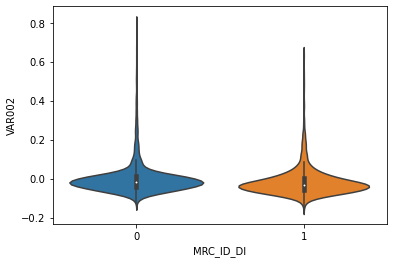

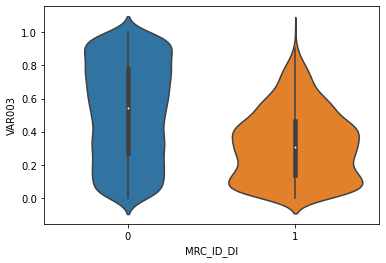

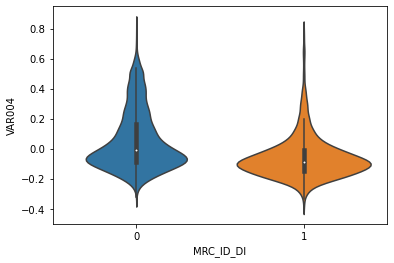

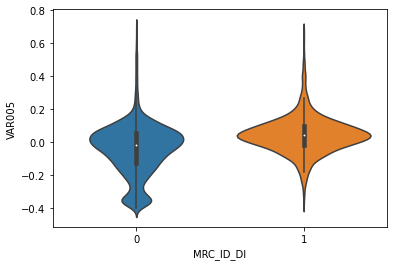

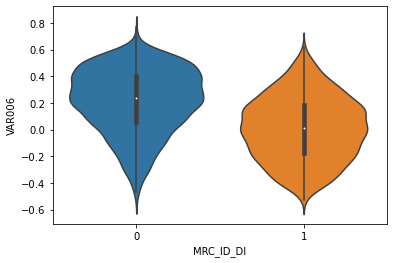

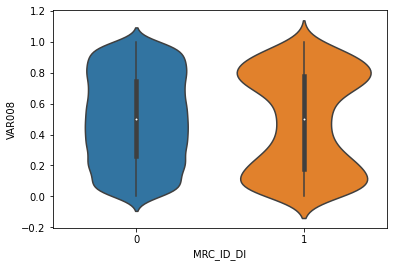

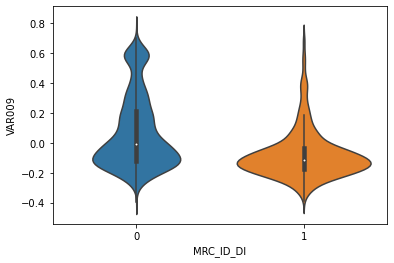

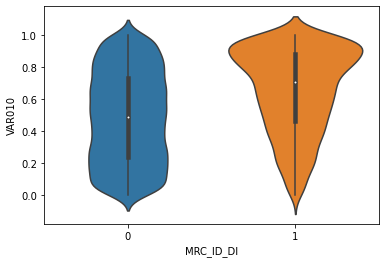

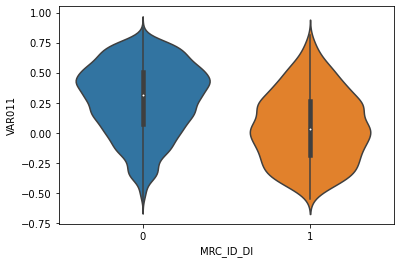

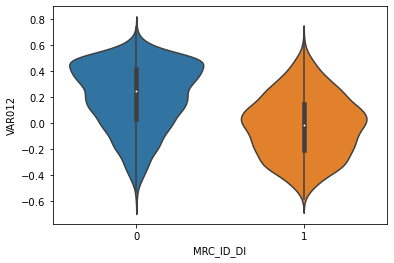

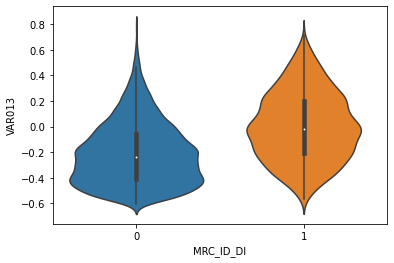

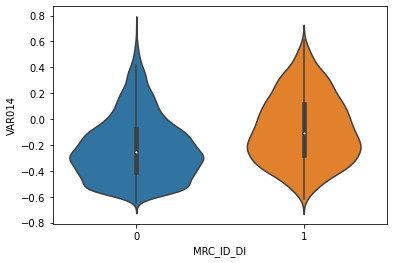

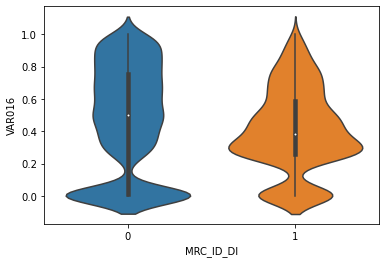

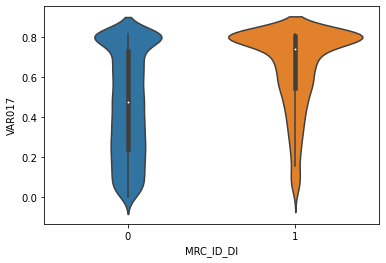

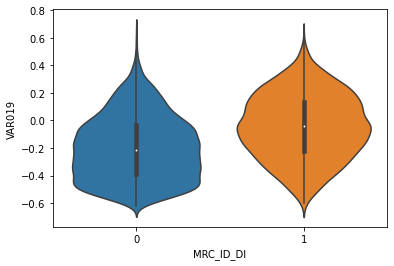

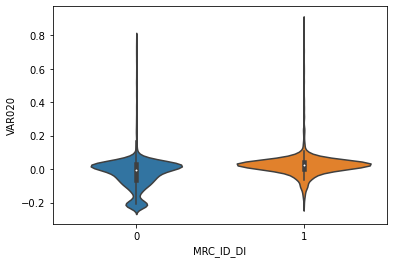

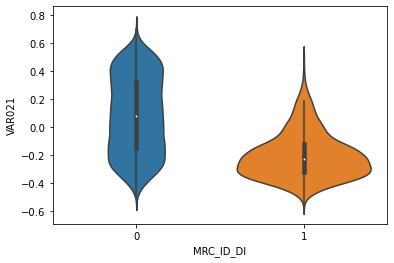

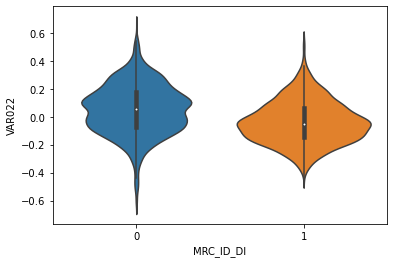

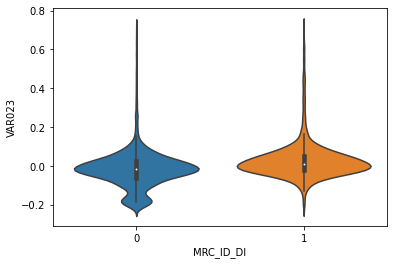

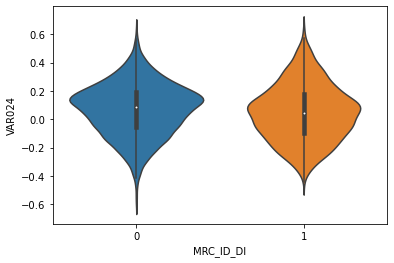

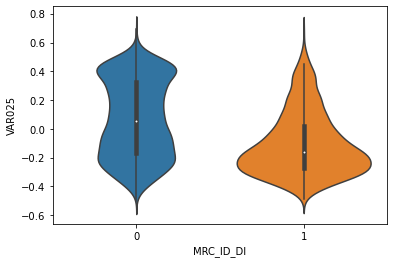

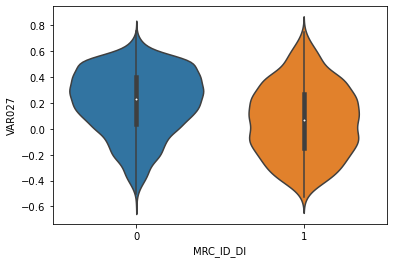

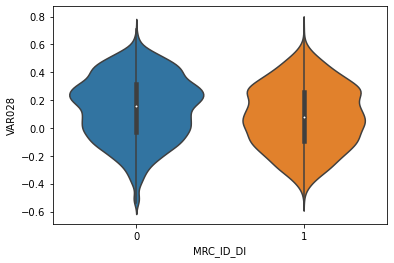

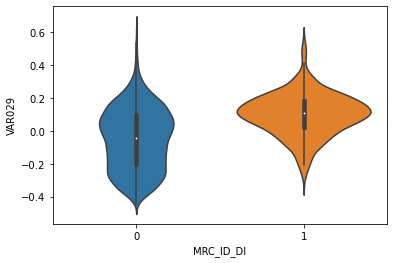

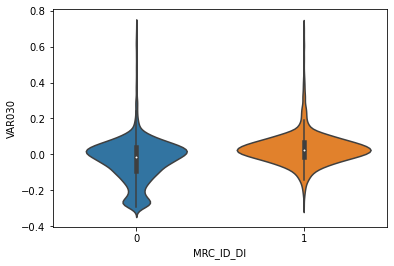

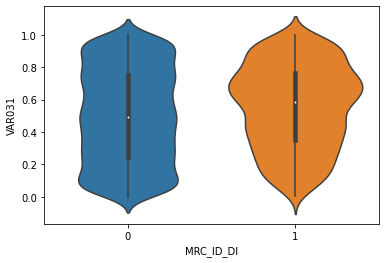

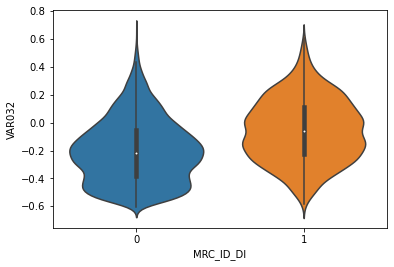

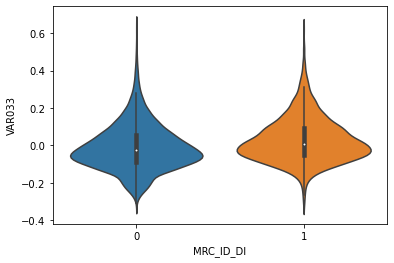

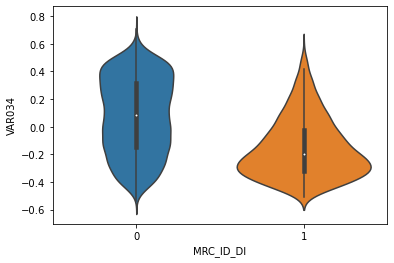

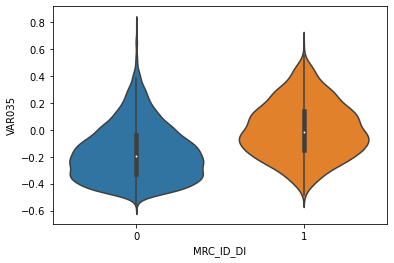

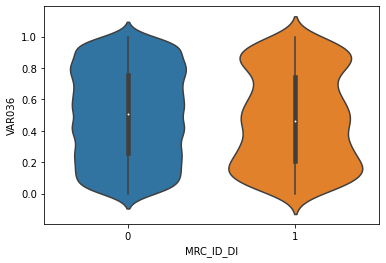

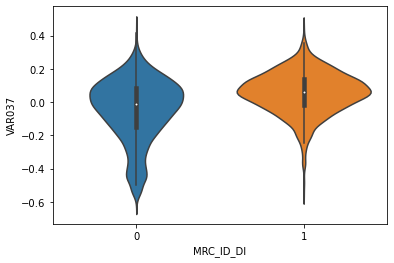

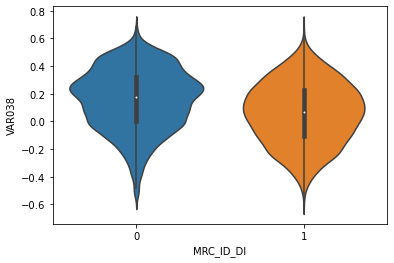

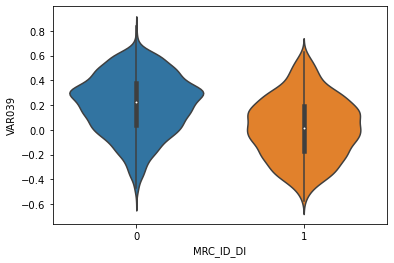

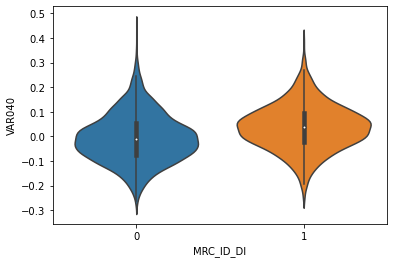

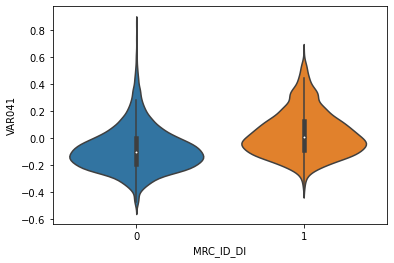

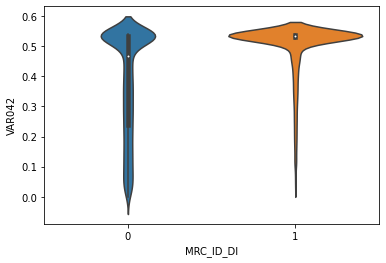

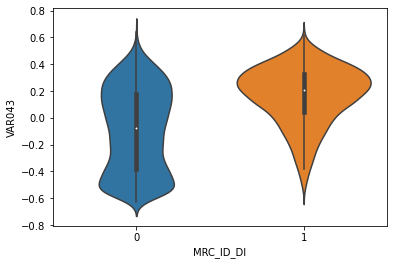

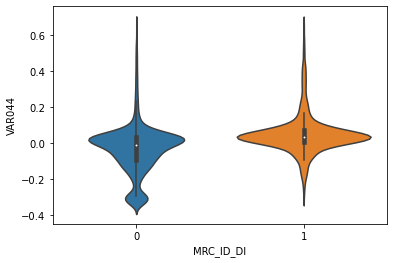

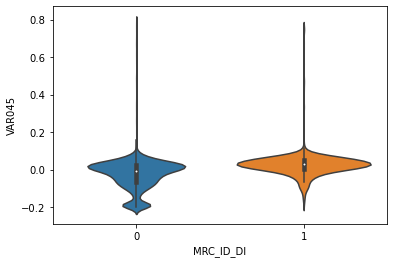

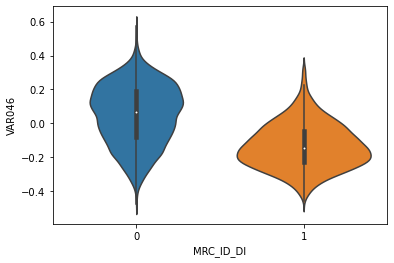

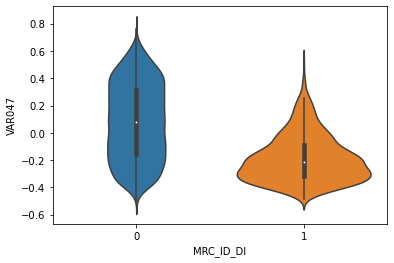

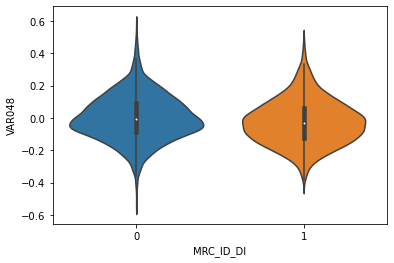

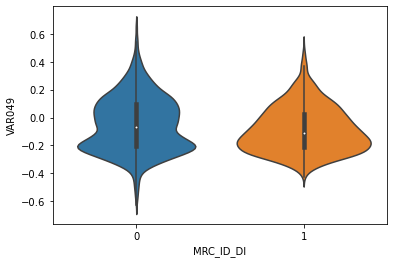

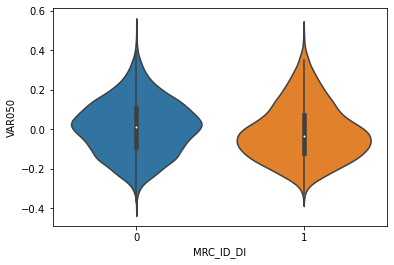

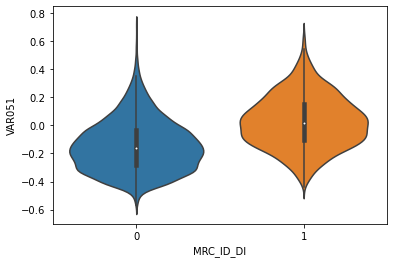

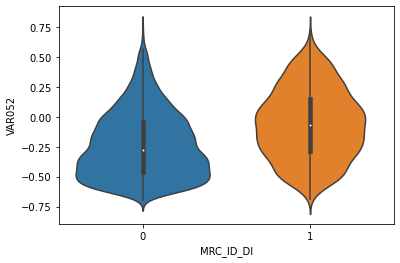

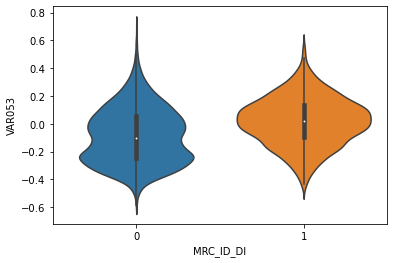

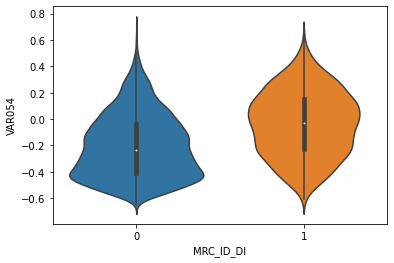

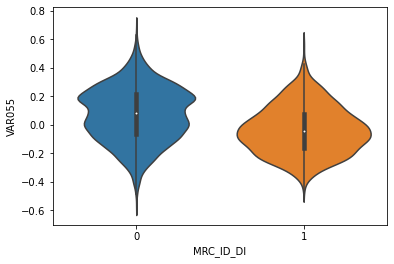

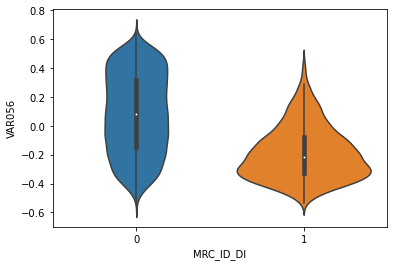

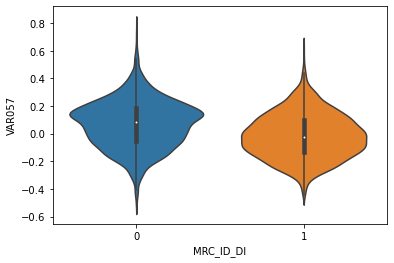

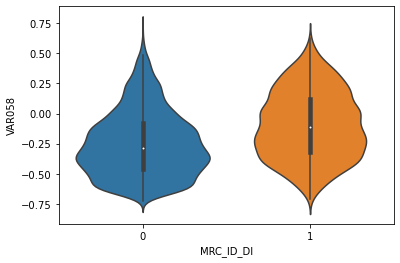

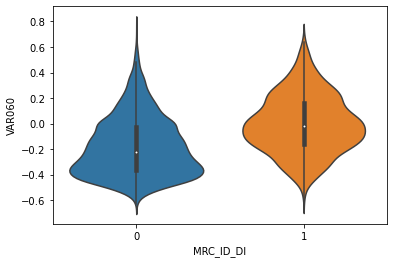

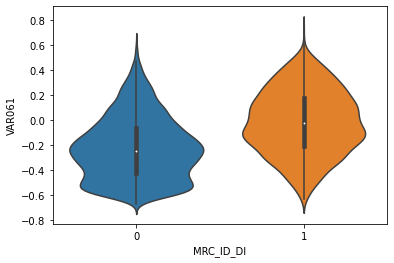

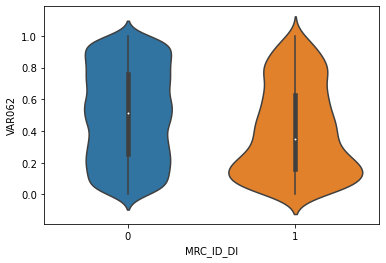

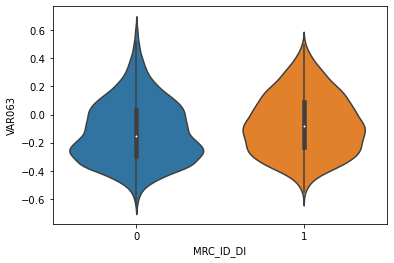

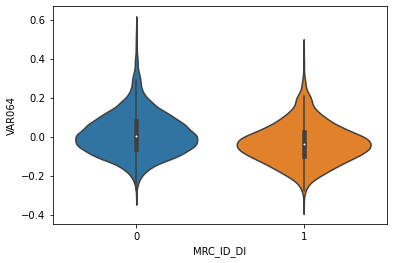

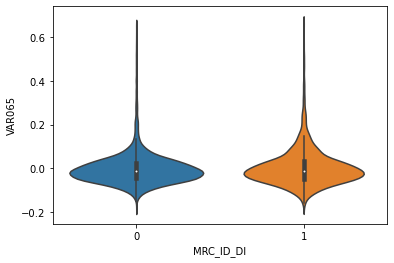

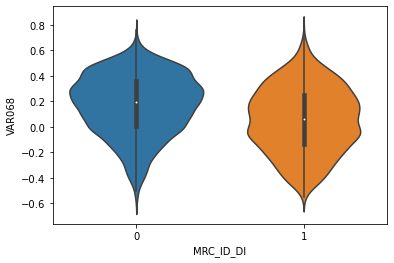

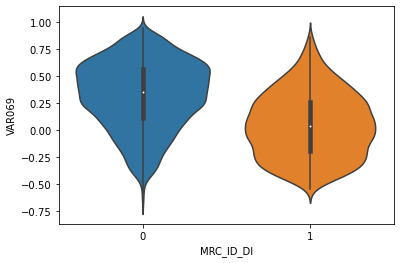

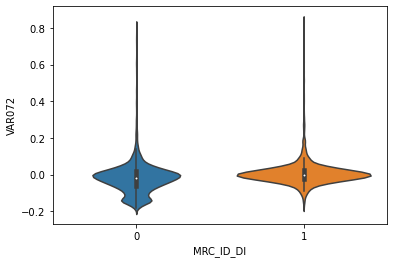

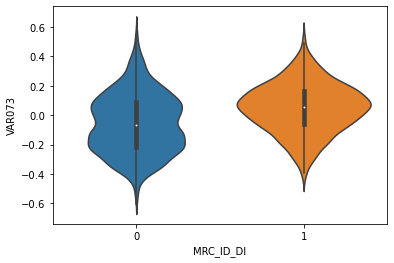

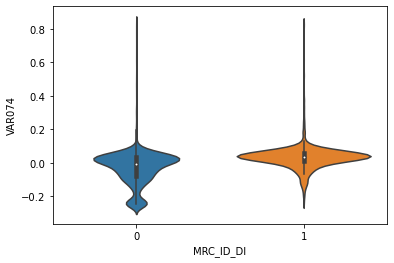

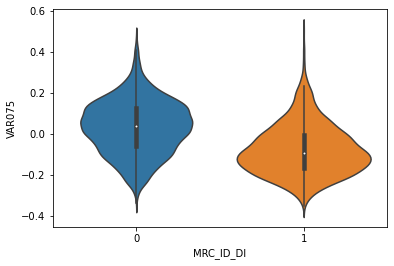

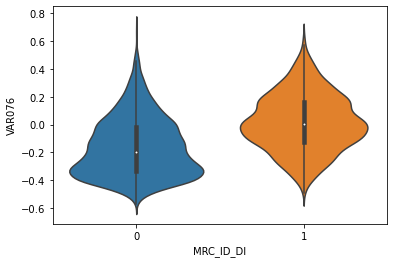

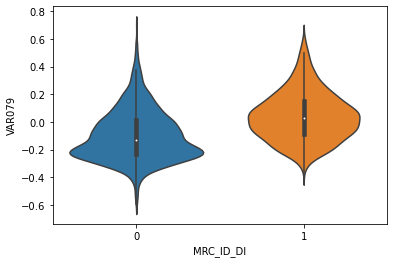

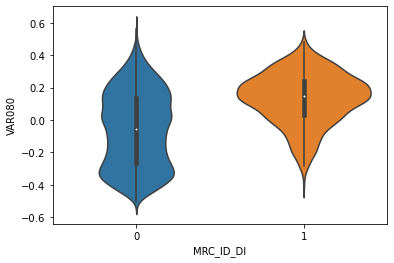

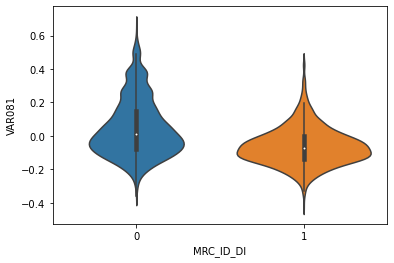

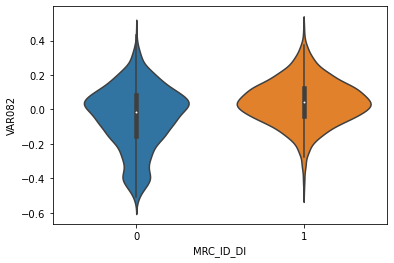

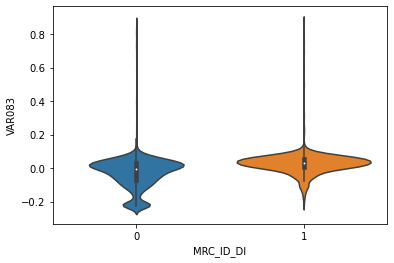

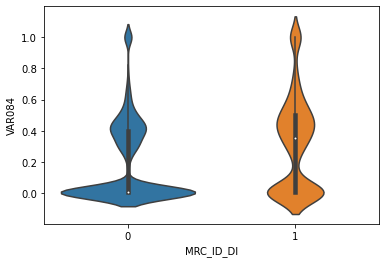

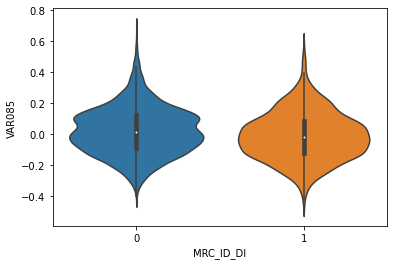

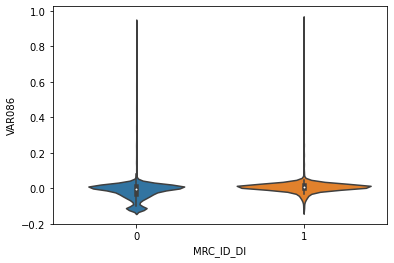

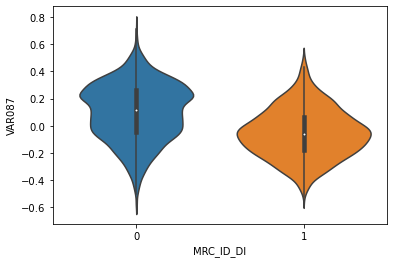

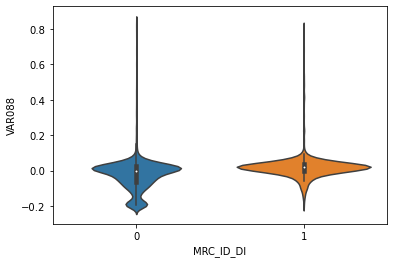

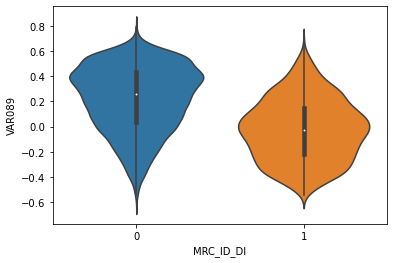

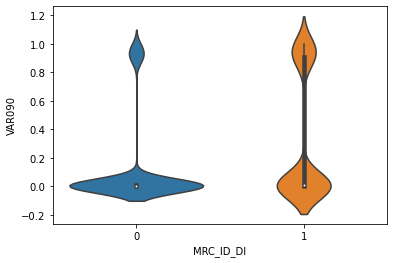

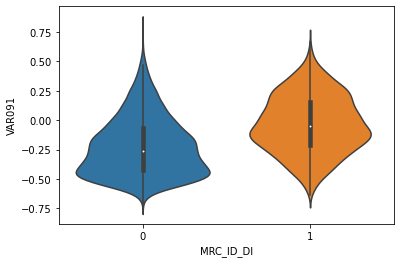

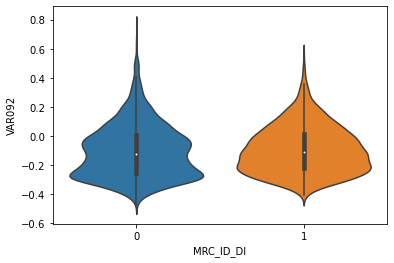

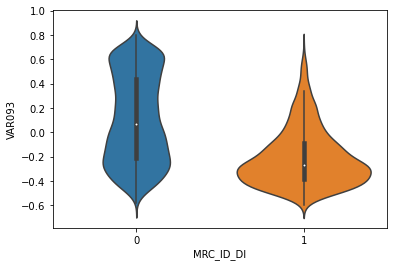

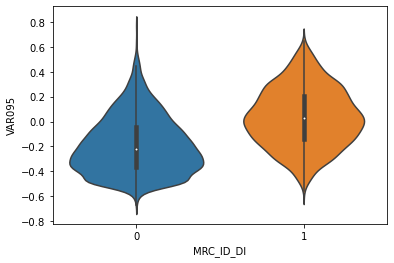

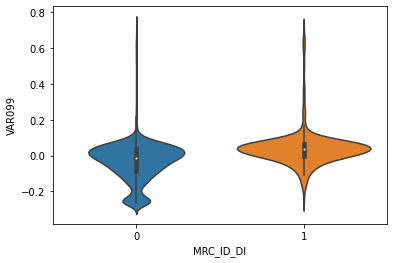

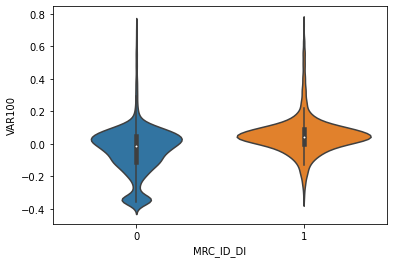

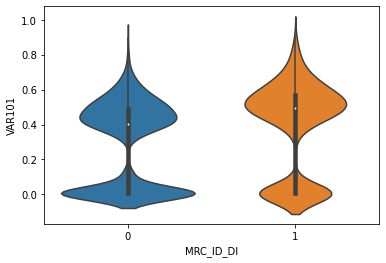

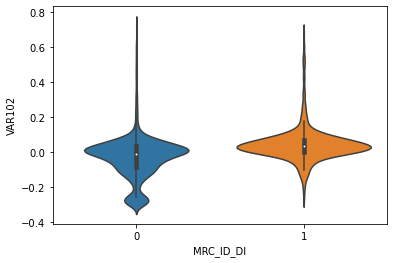

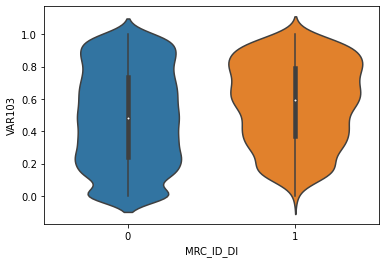

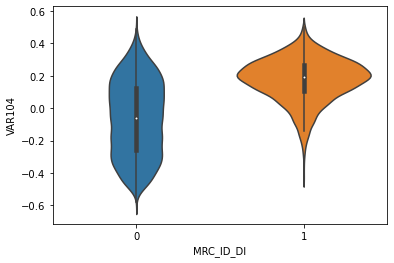

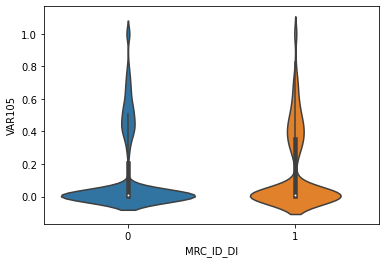

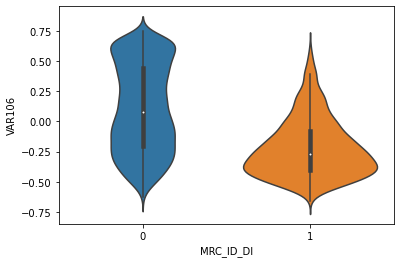

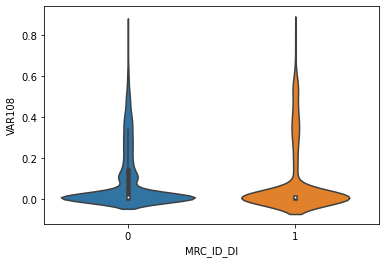

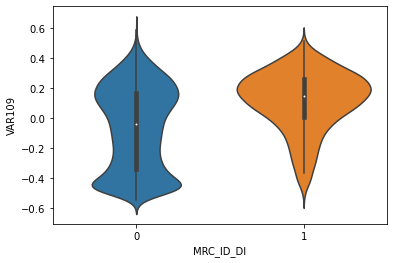

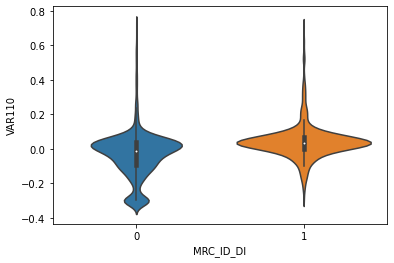

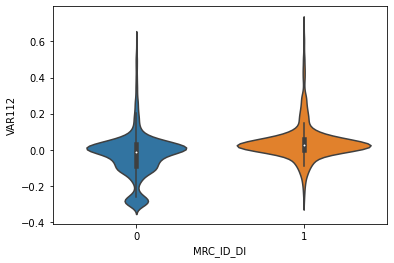

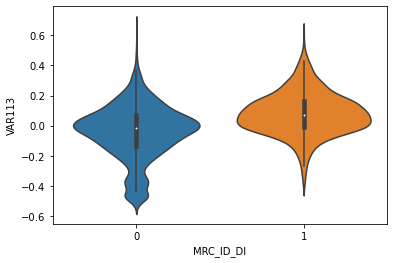

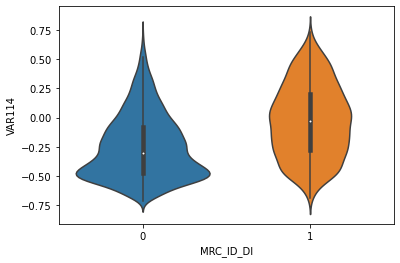

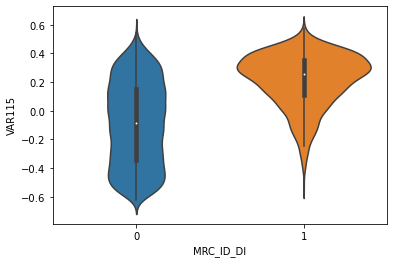

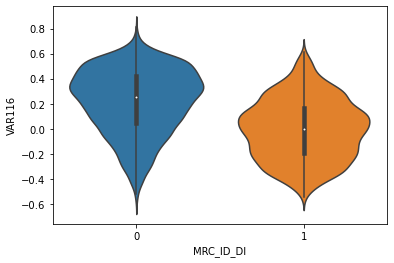

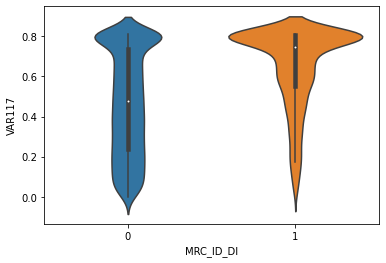

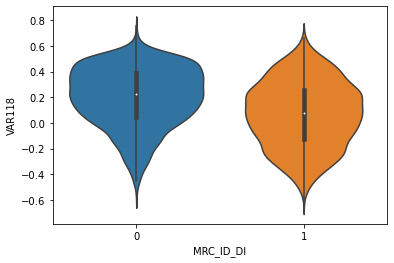

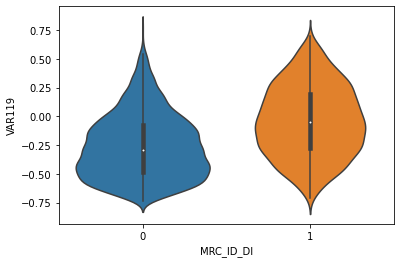

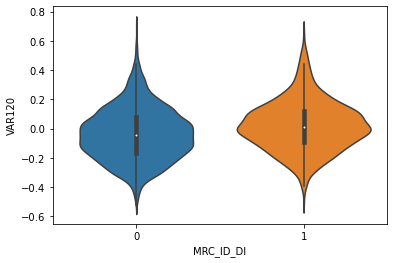

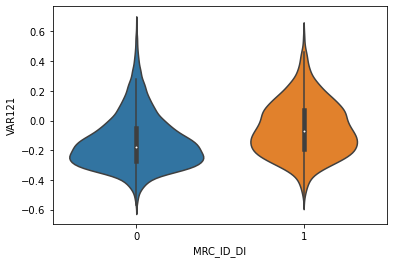

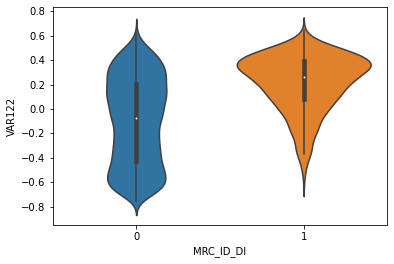

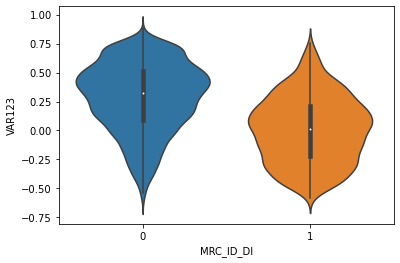

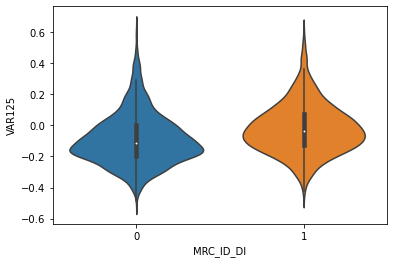

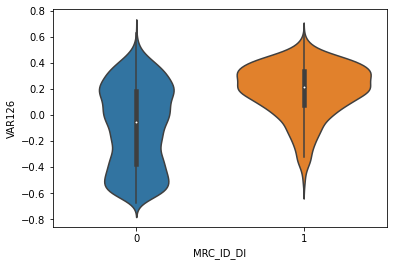

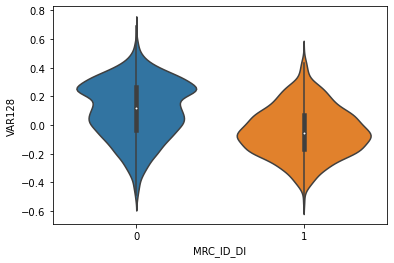

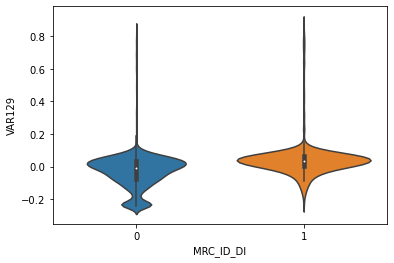

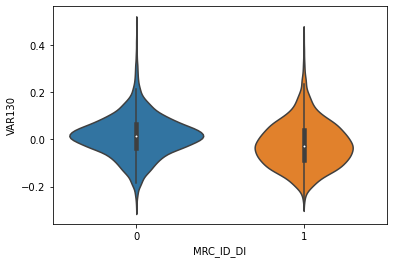

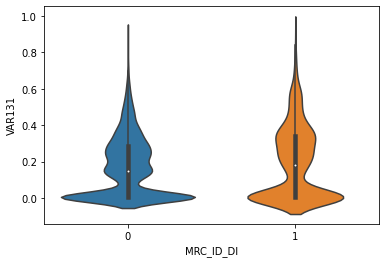

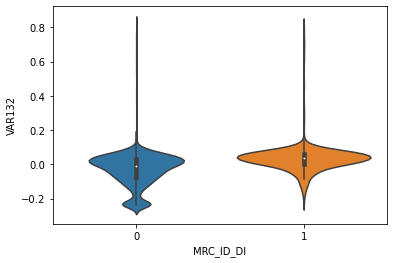

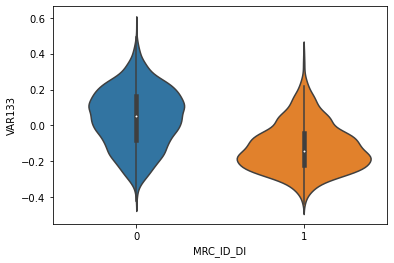

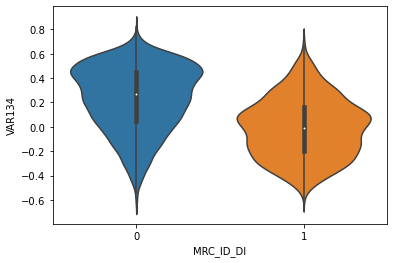

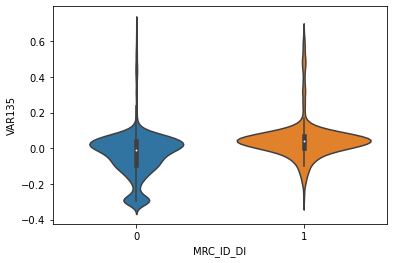

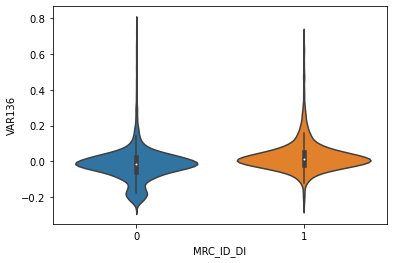

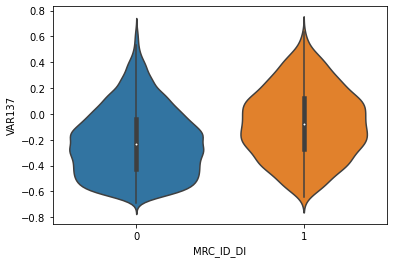

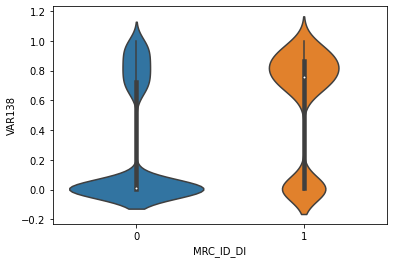

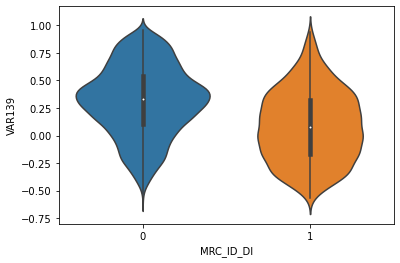

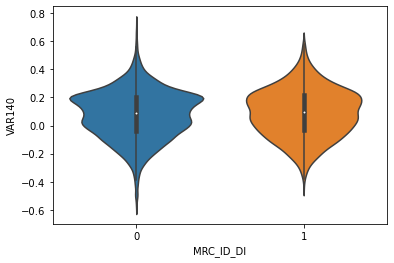

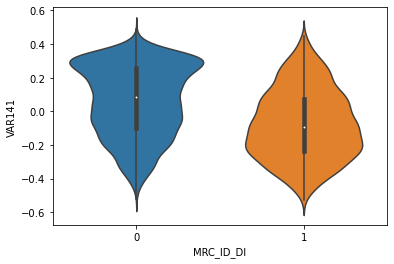

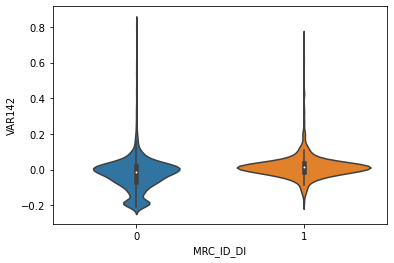

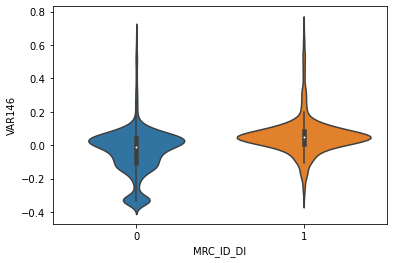

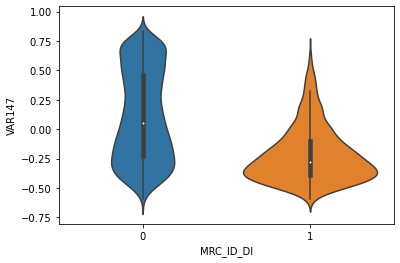

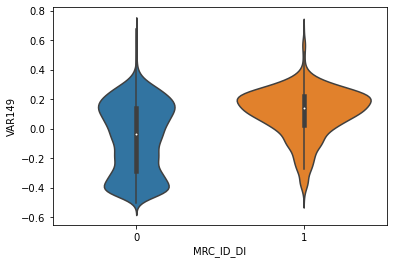

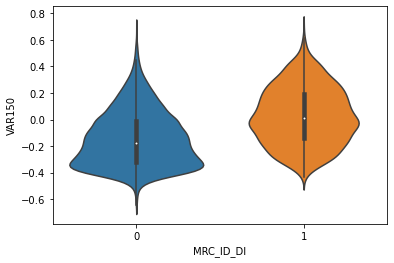

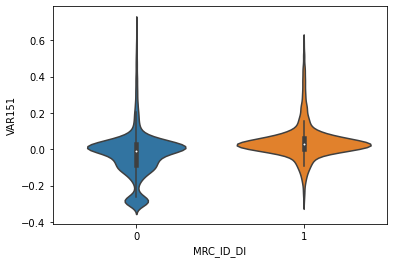

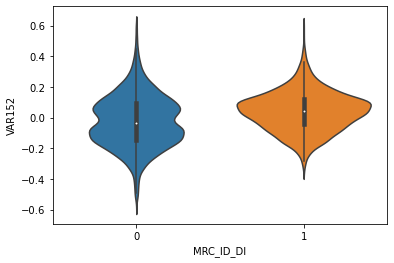

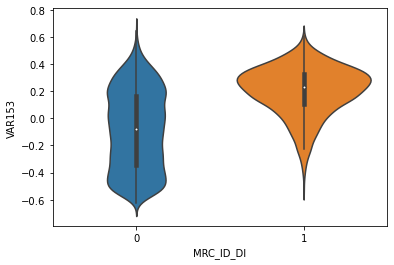

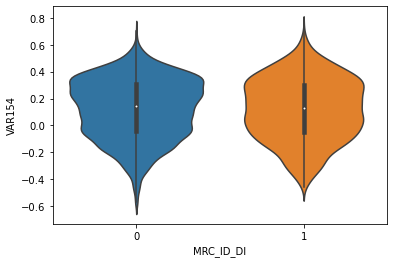

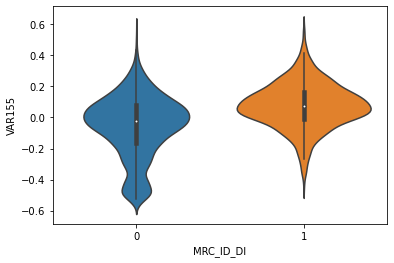

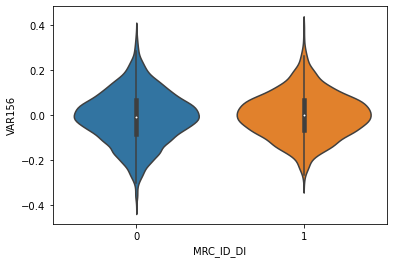

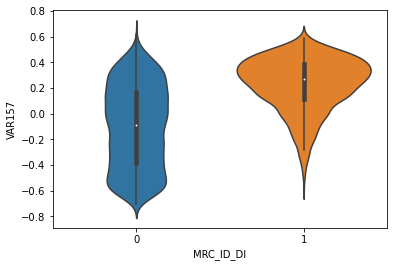

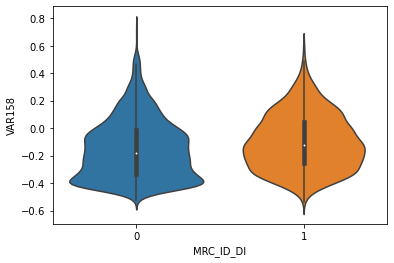

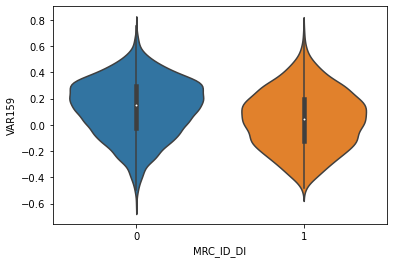

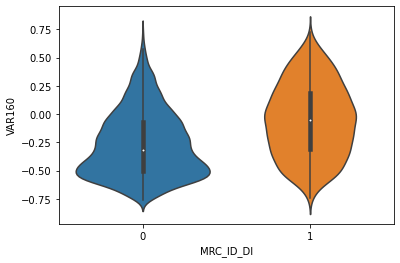

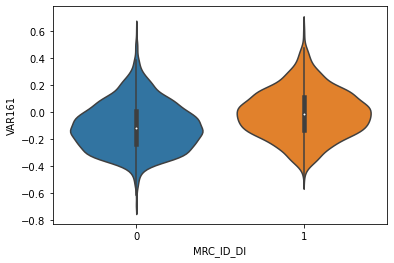

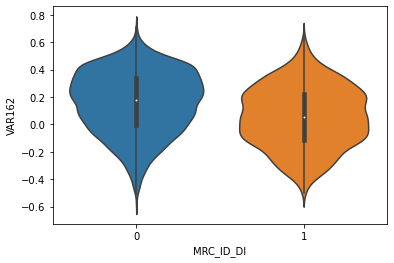

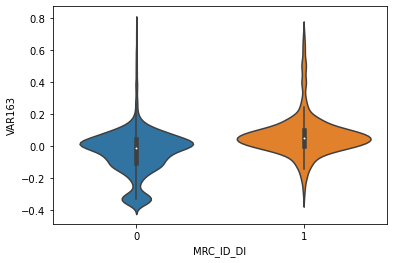

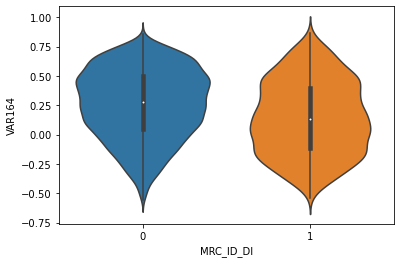

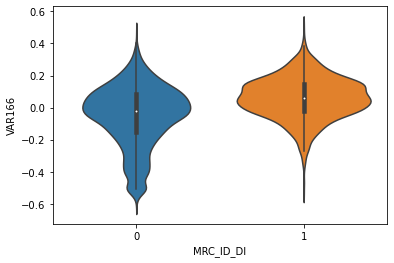

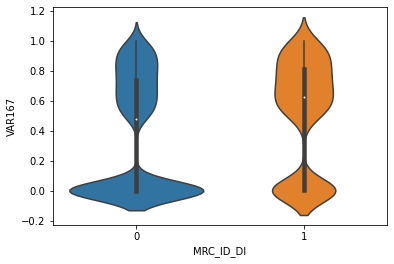

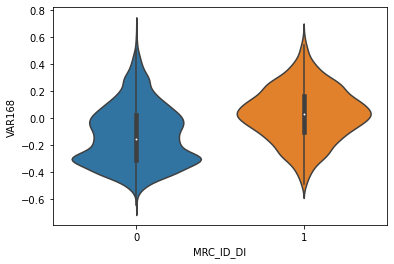

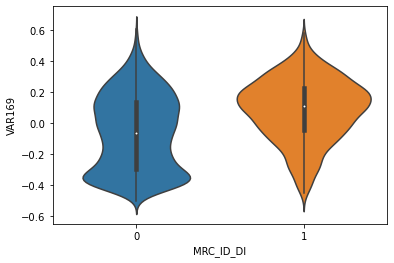

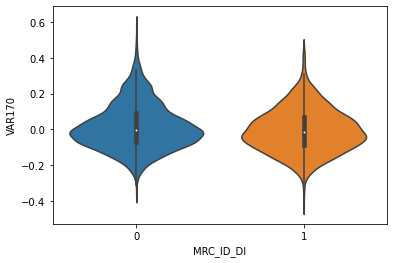

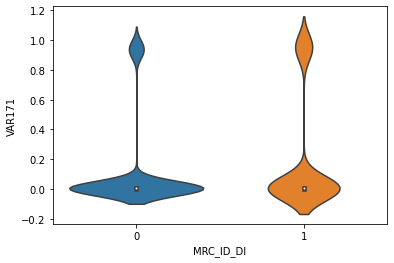

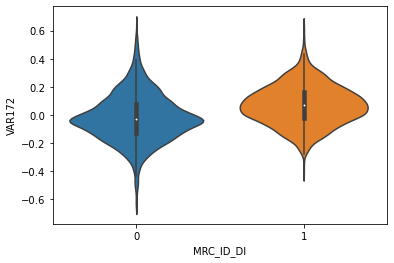

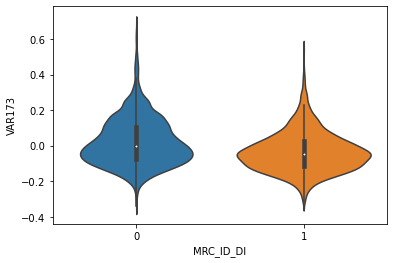

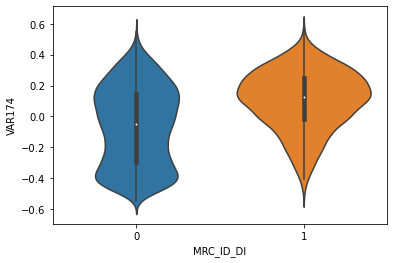

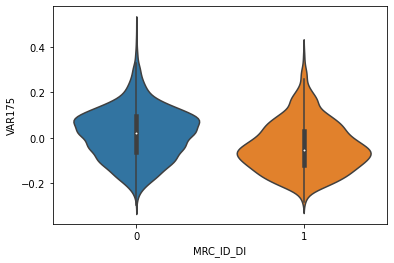

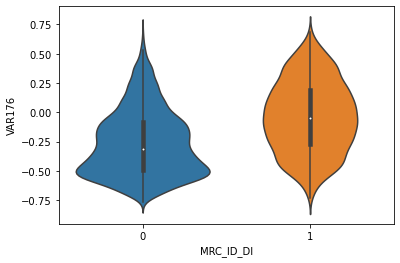

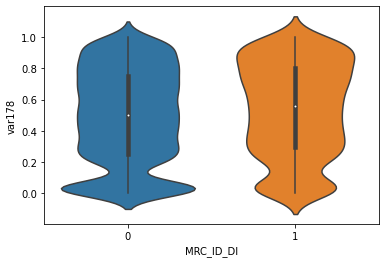

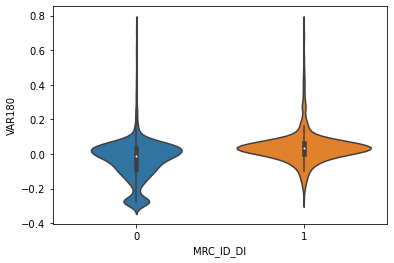

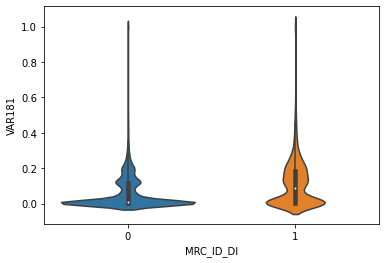

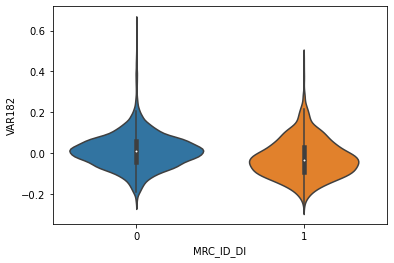

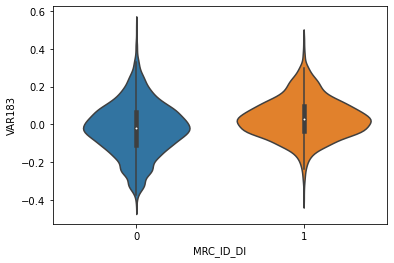

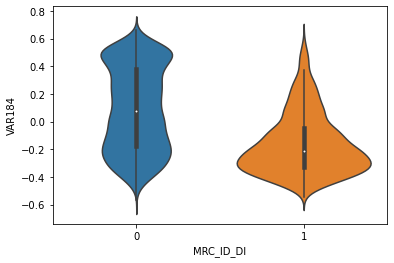

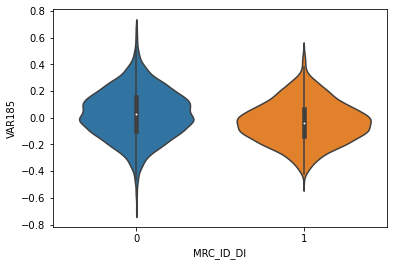

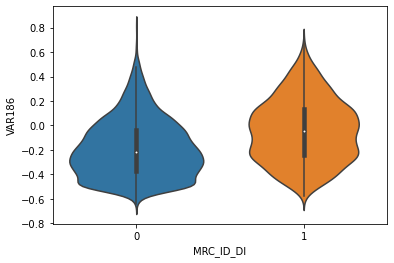

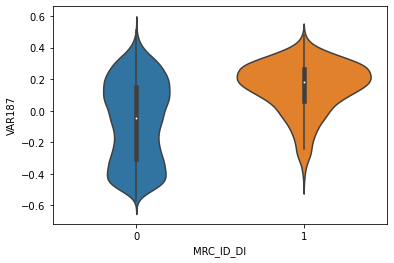

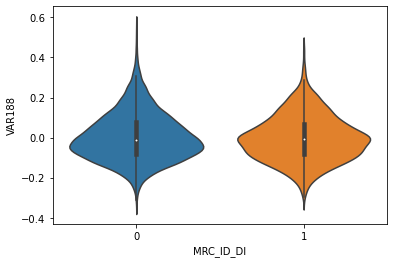

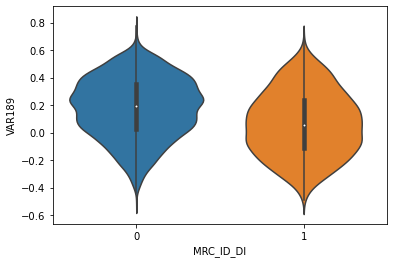

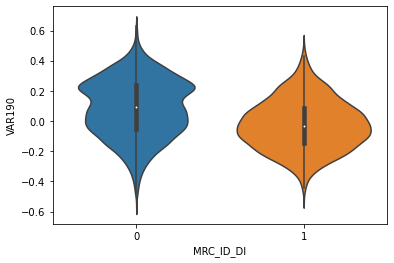

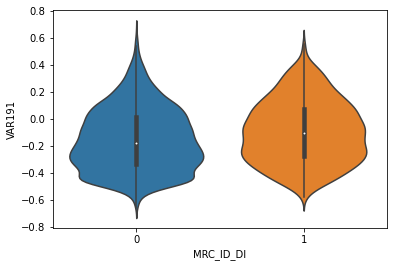

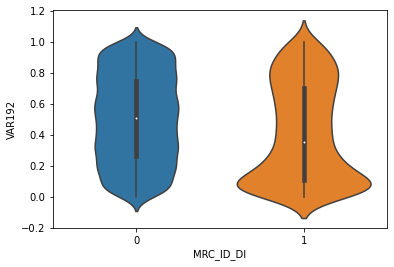

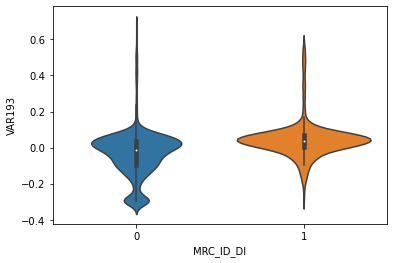

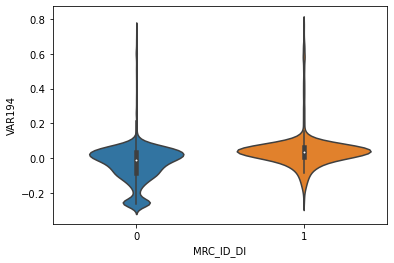

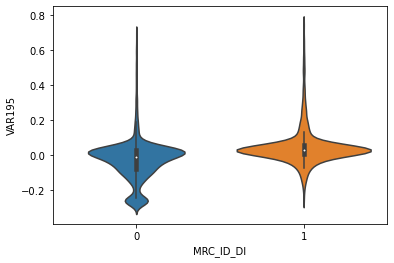

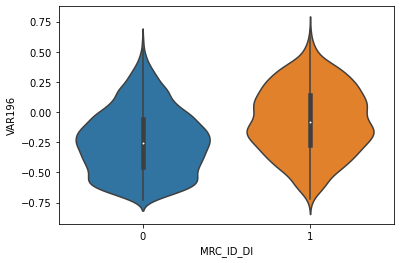

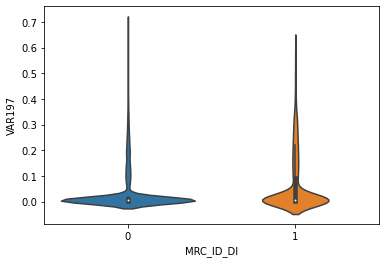

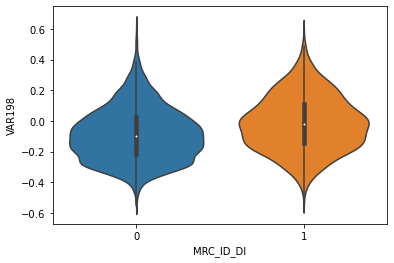

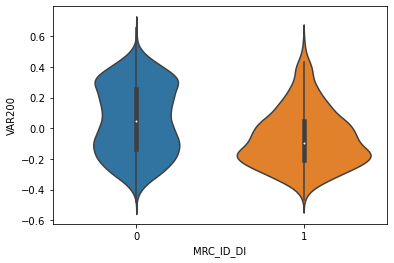

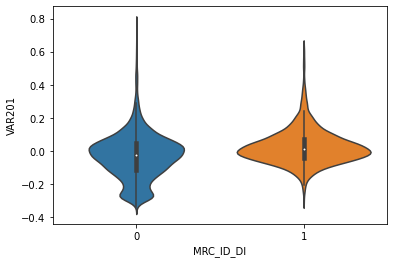

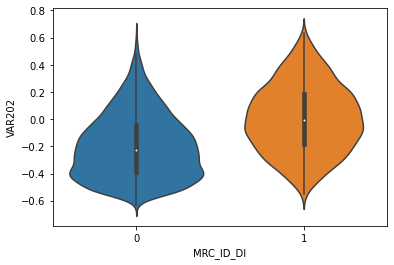

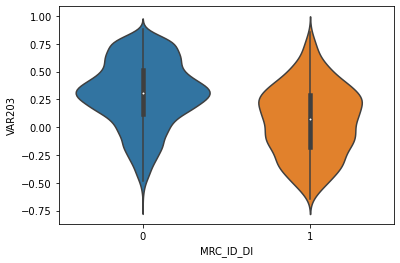

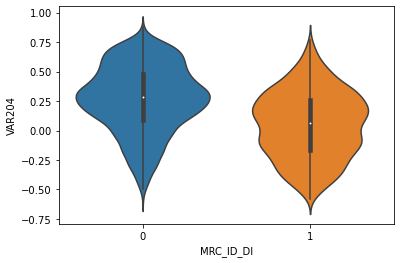

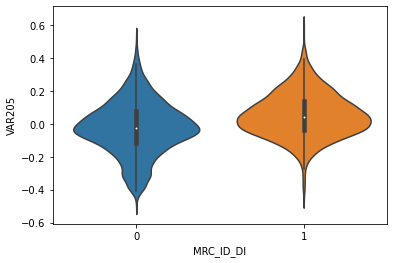

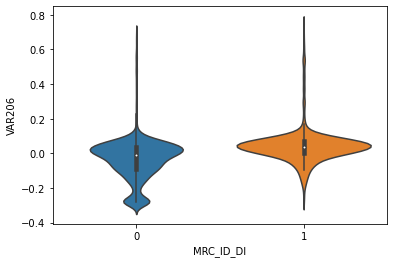

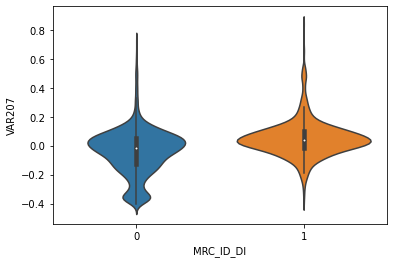

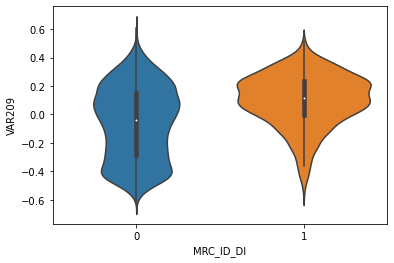

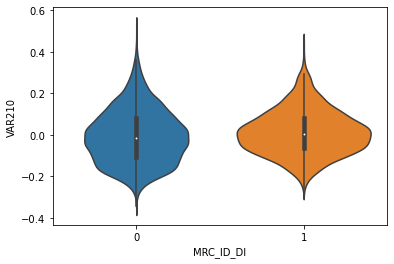

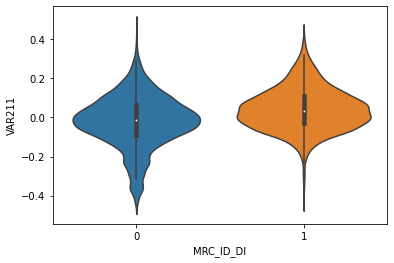

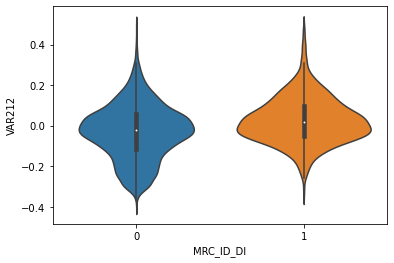

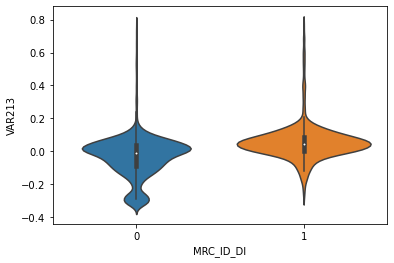

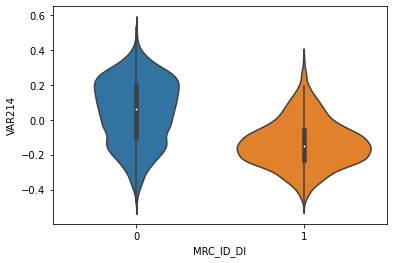

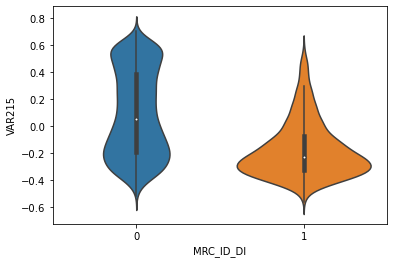

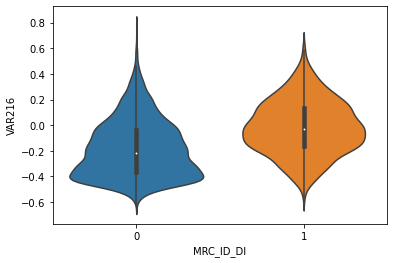

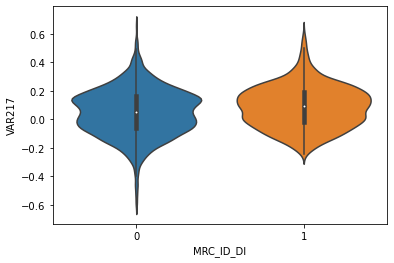

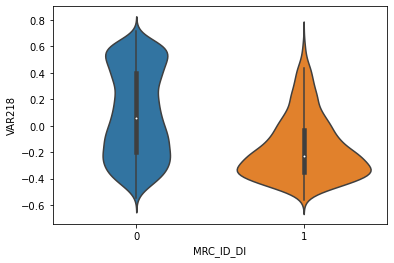

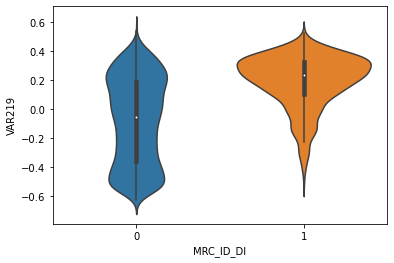

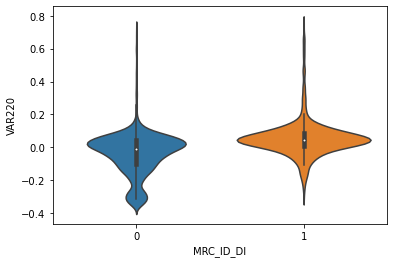

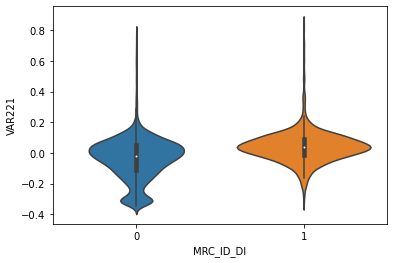

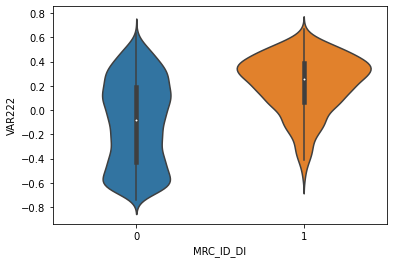

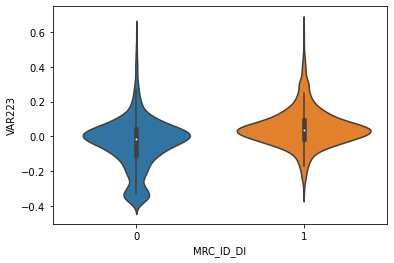

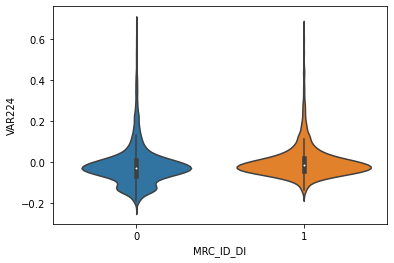

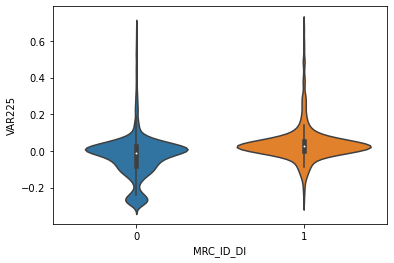

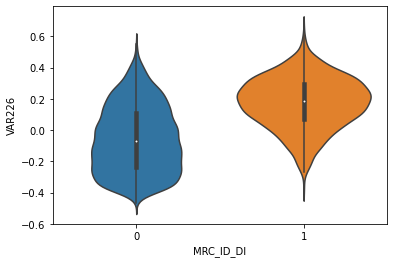

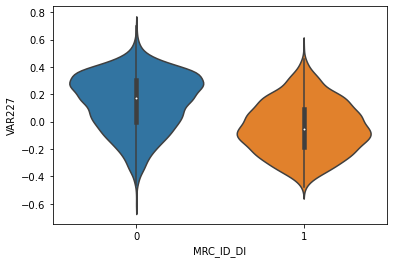

KeyError: 'MRC_ID_DI'

In [8]:
for i in df.columns[1:]:
    if nc.loc[i,'dType'] =='numerical':
        sns.violinplot(x="MRC_ID_DI",y=i,data=df)
        plt.show()
    

In [ ]:
is_zero = df['MRC_ID_DI'] == 0
df_z = df[is_zero]
df_z

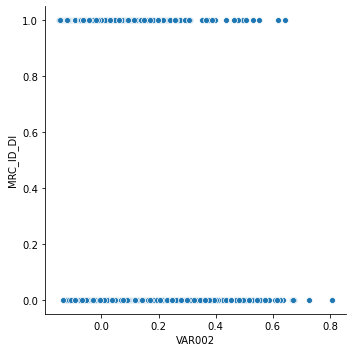

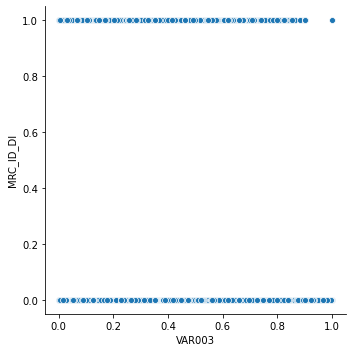

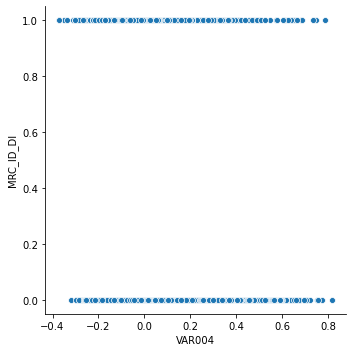

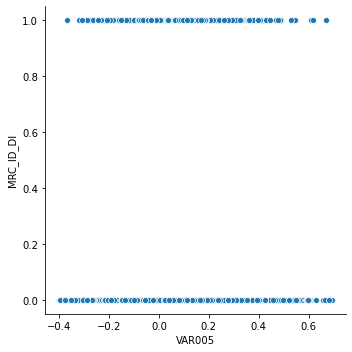

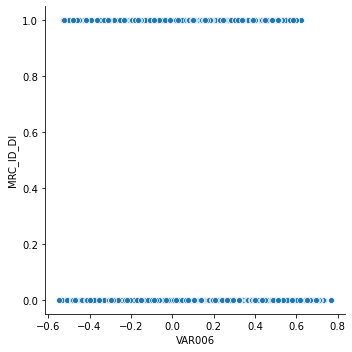

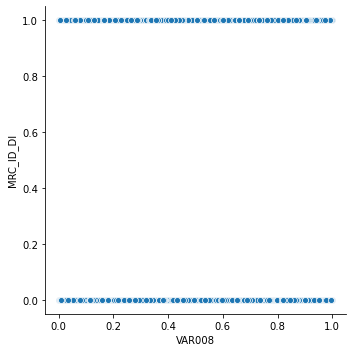

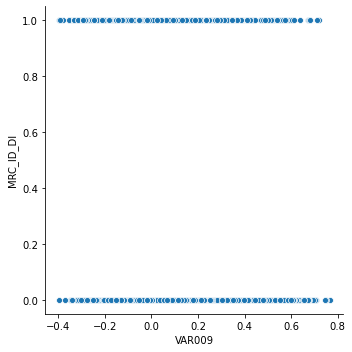

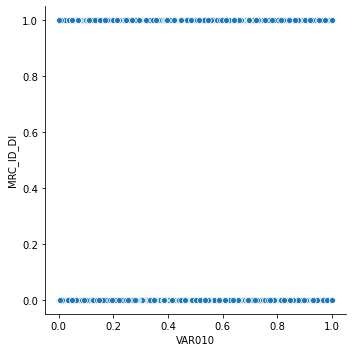

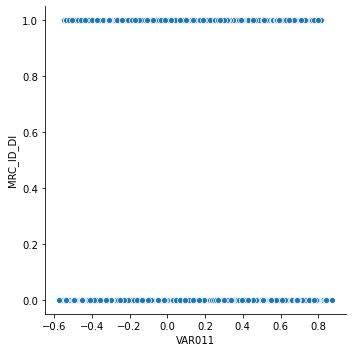

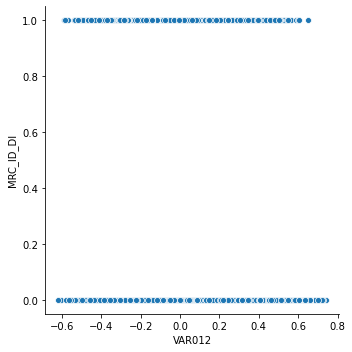

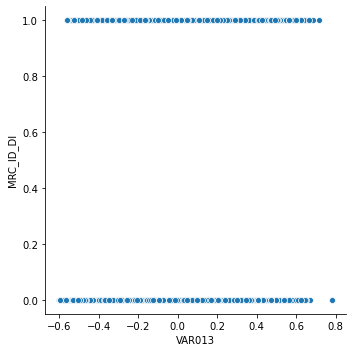

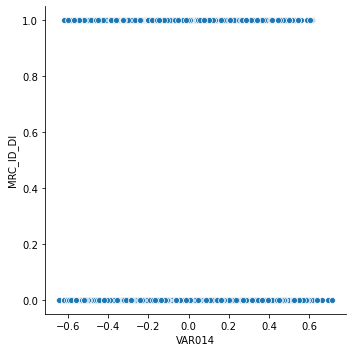

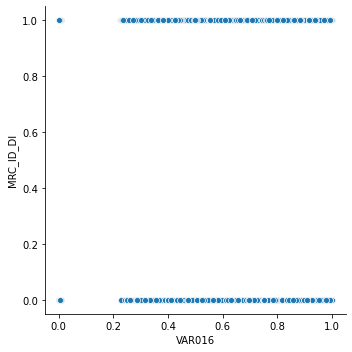

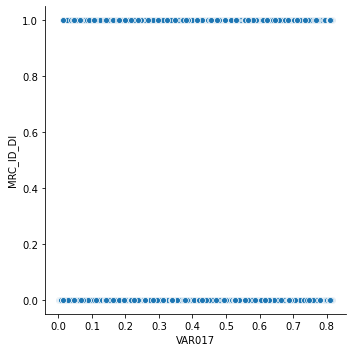

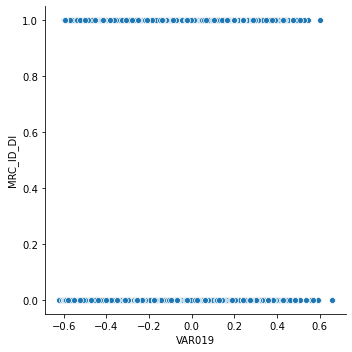

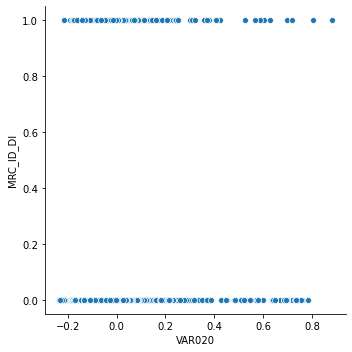

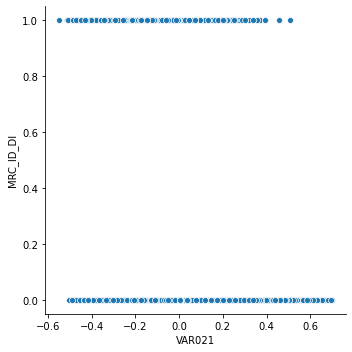

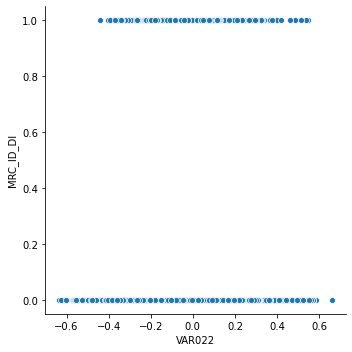

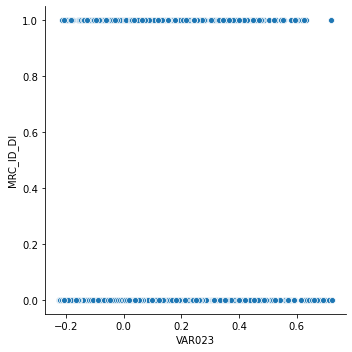

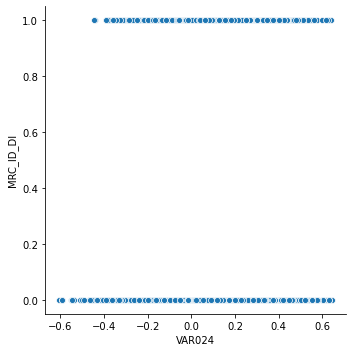

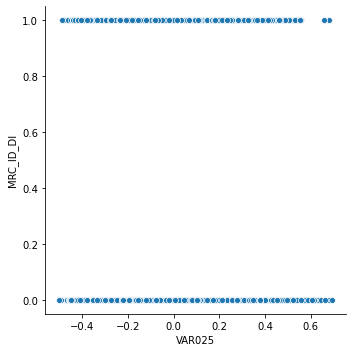

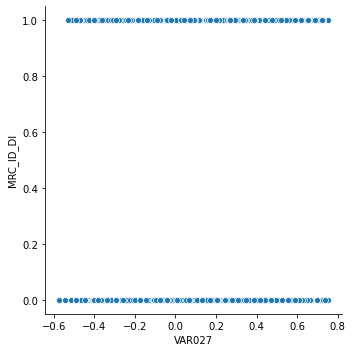

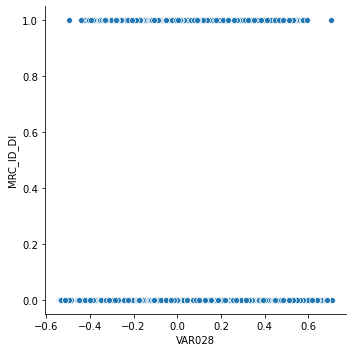

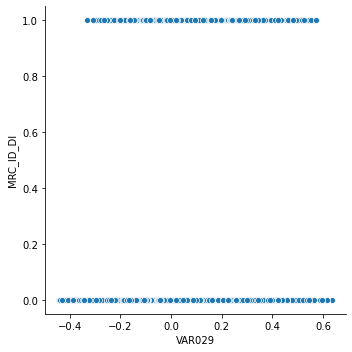

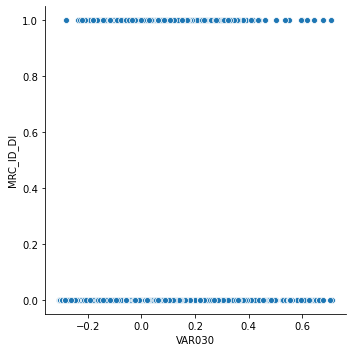

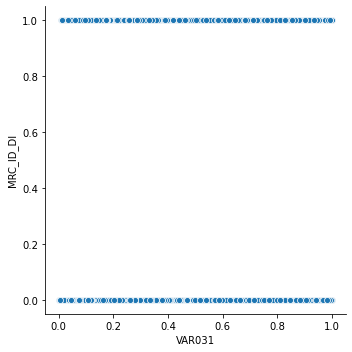

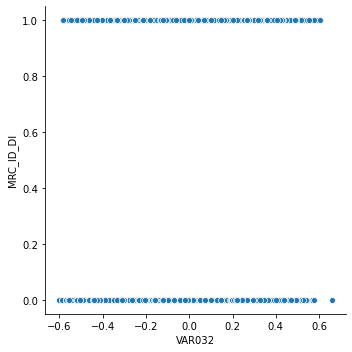

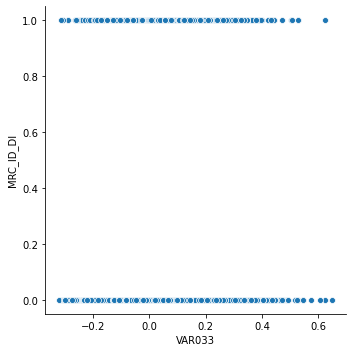

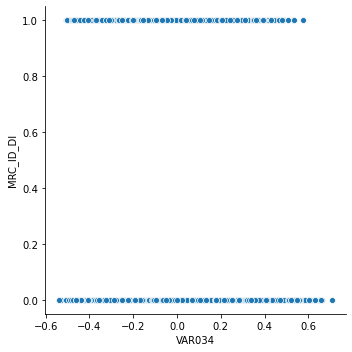

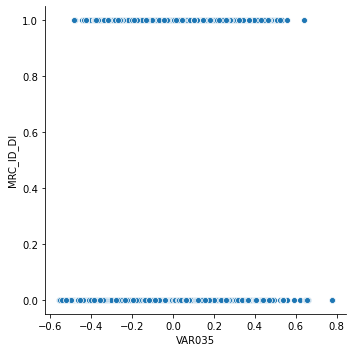

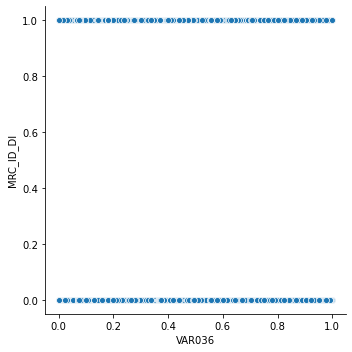

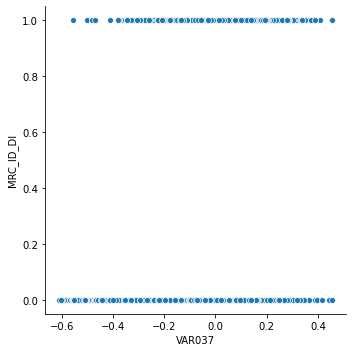

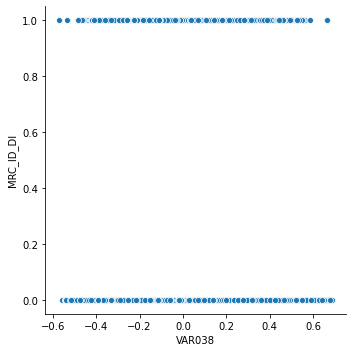

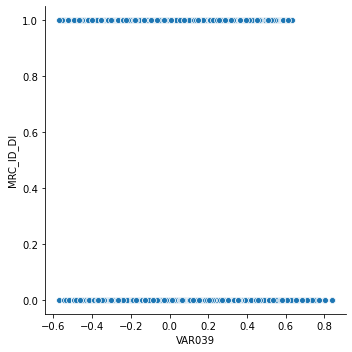

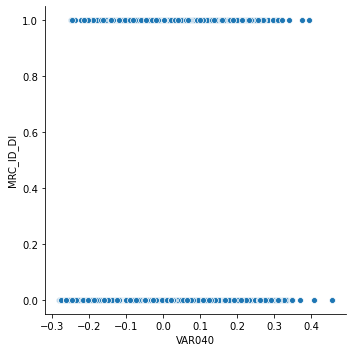

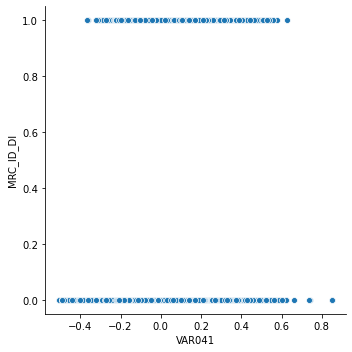

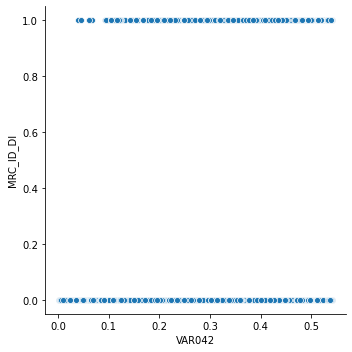

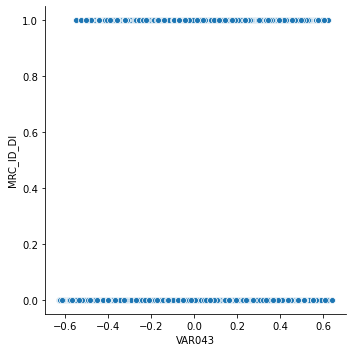

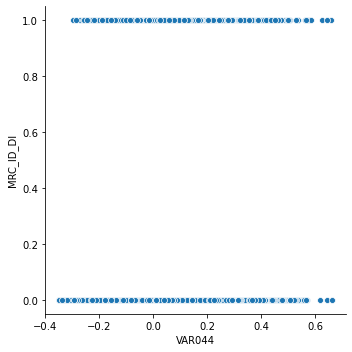

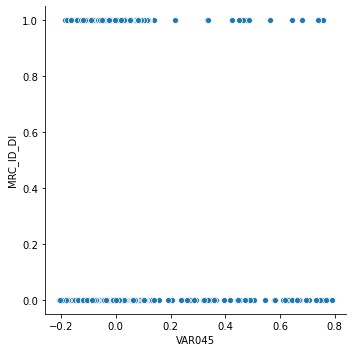

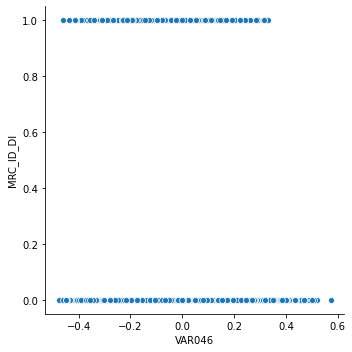

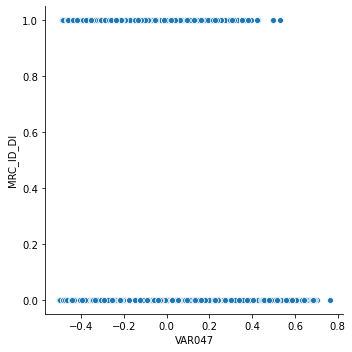

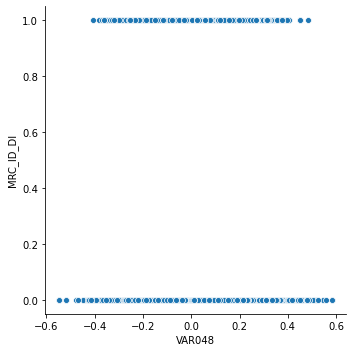

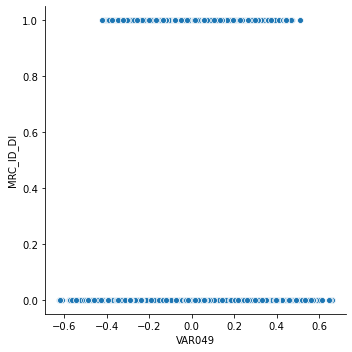

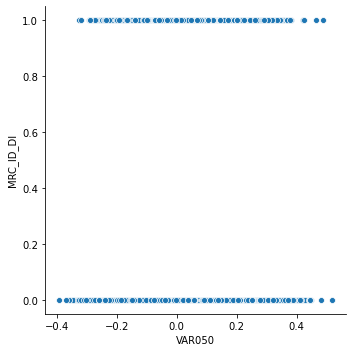

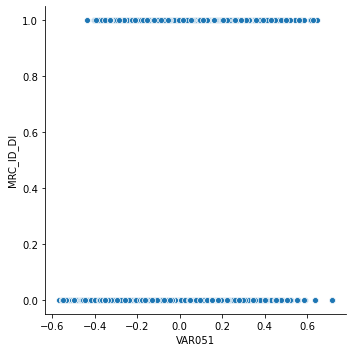

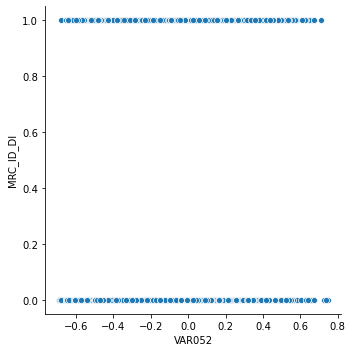

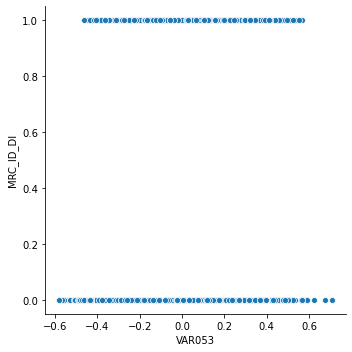

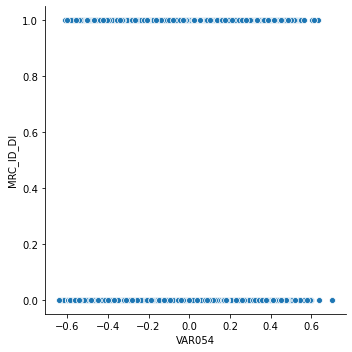

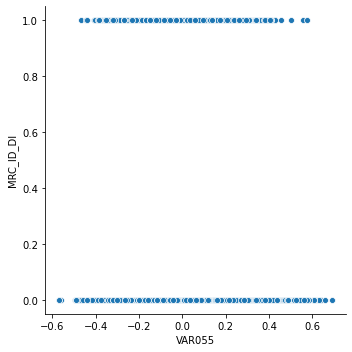

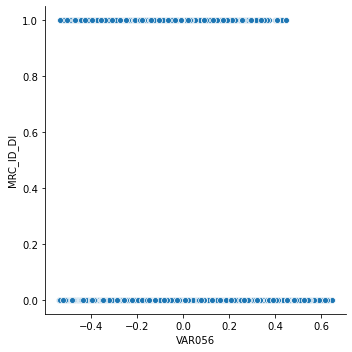

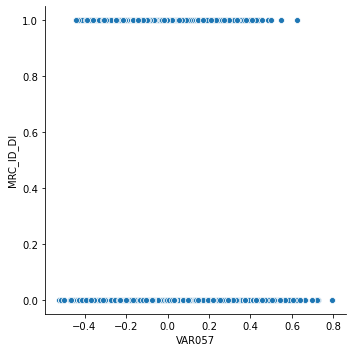

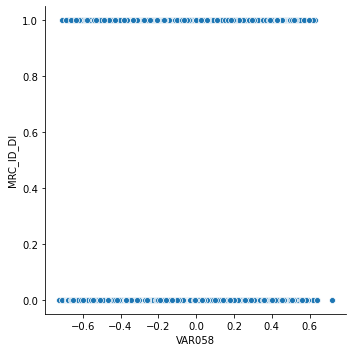

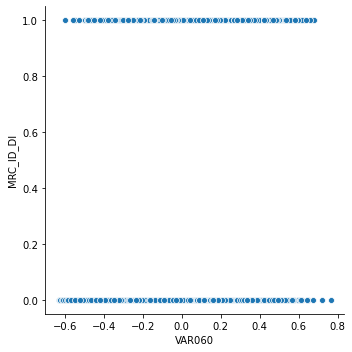

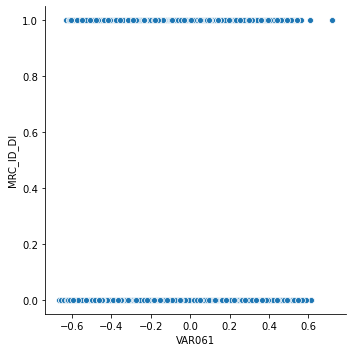

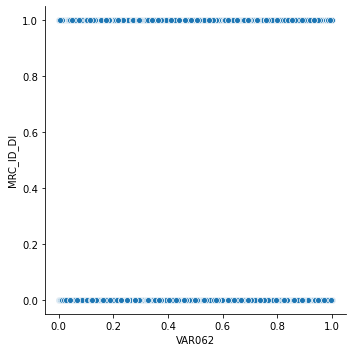

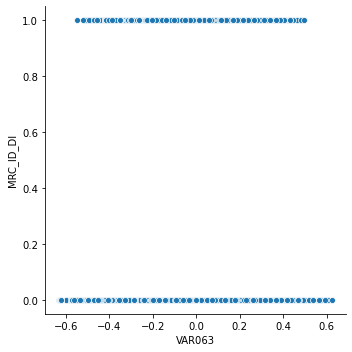

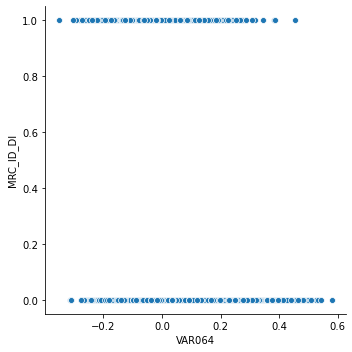

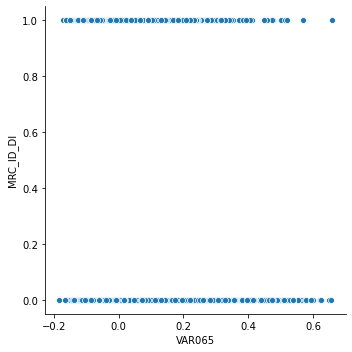

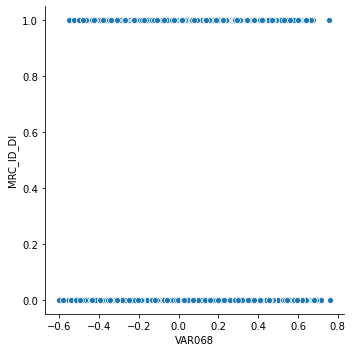

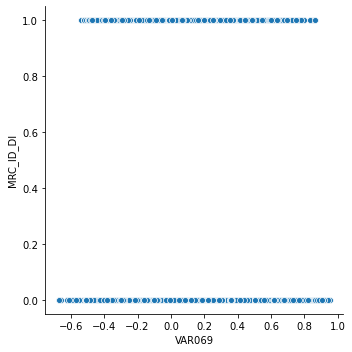

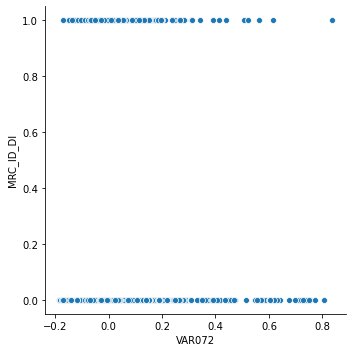

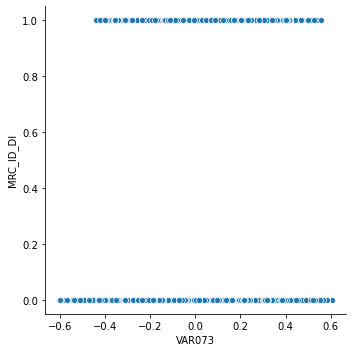

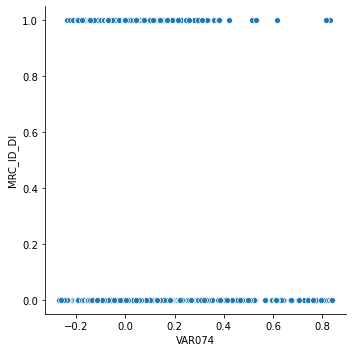

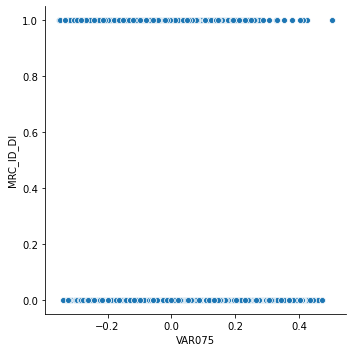

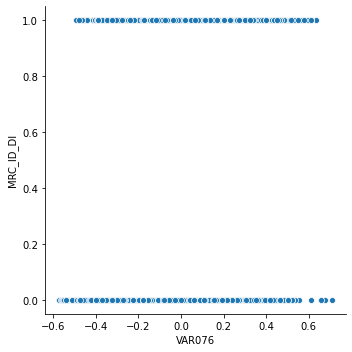

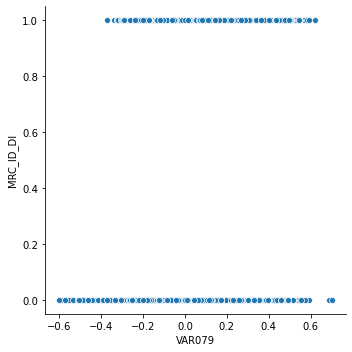

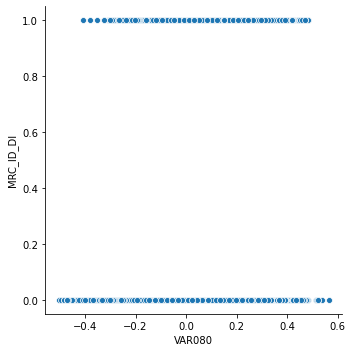

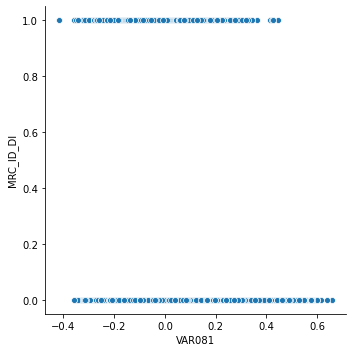

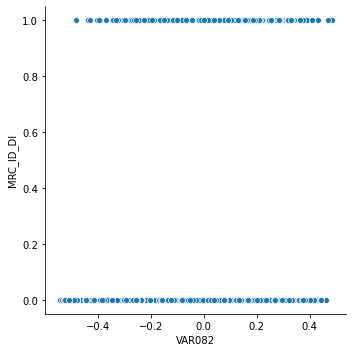

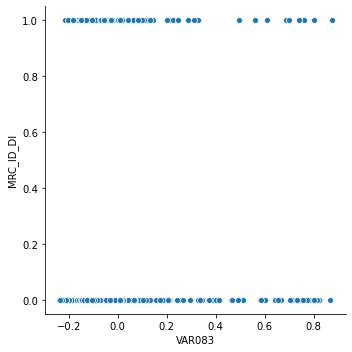

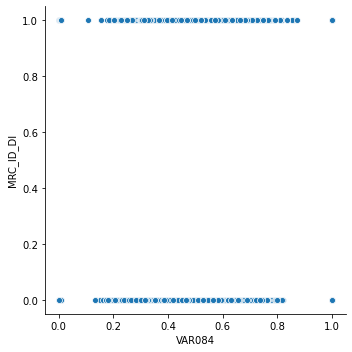

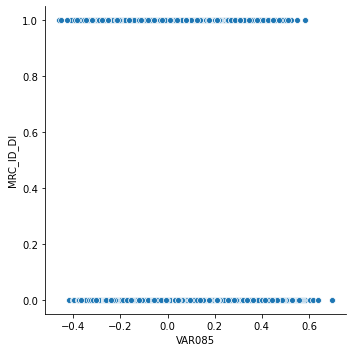

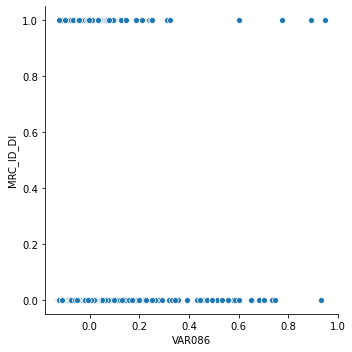

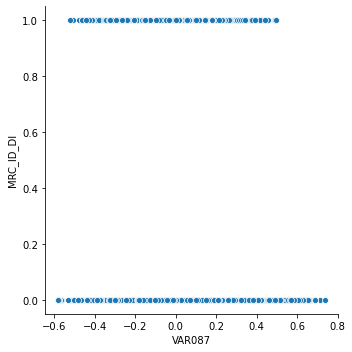

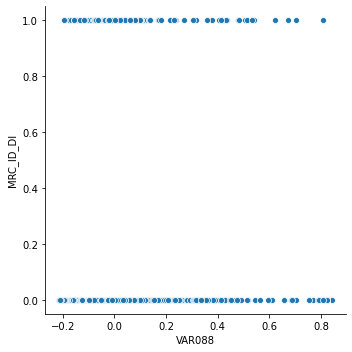

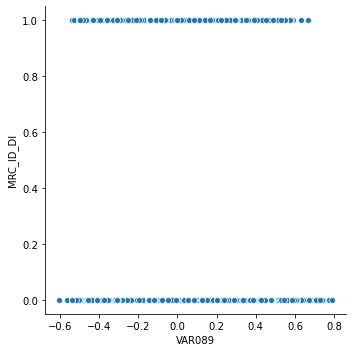

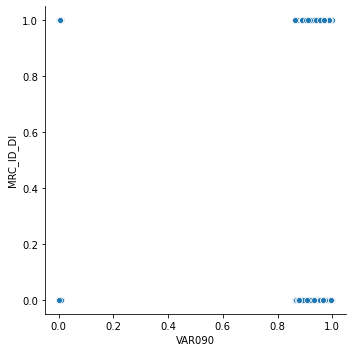

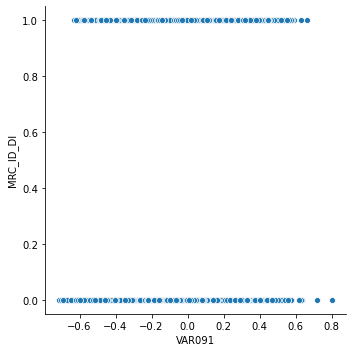

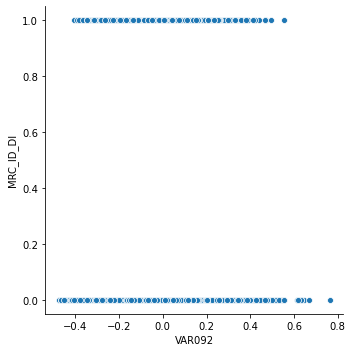

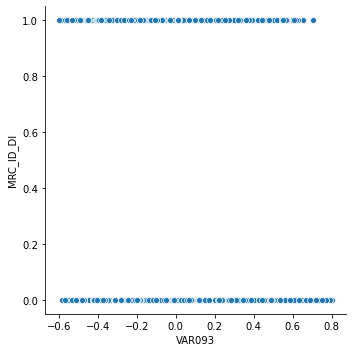

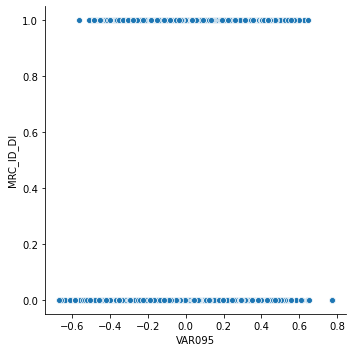

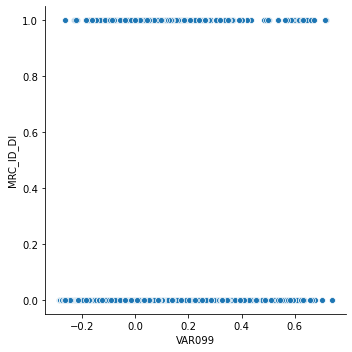

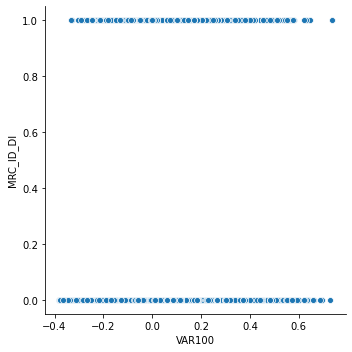

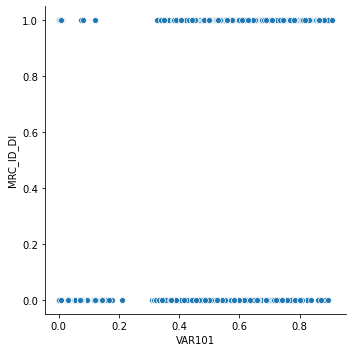

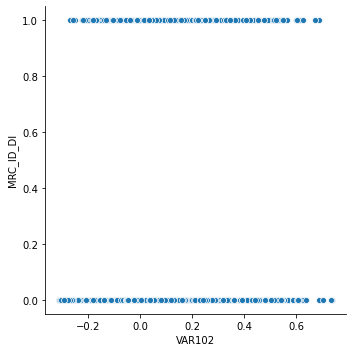

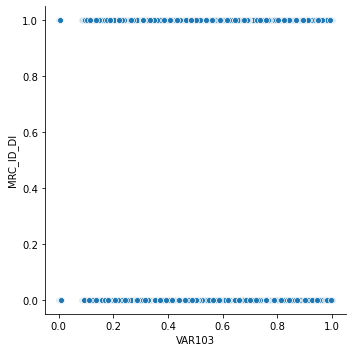

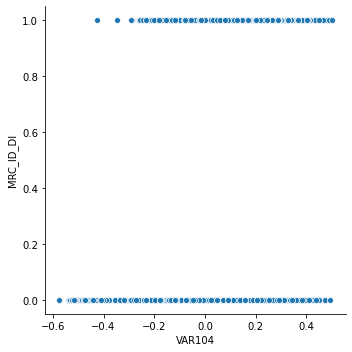

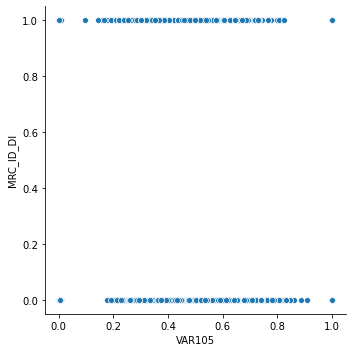

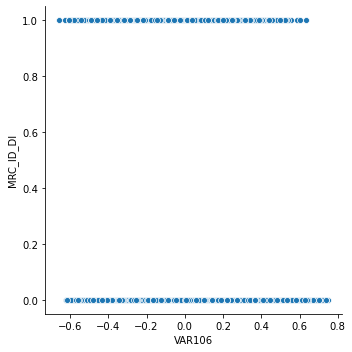

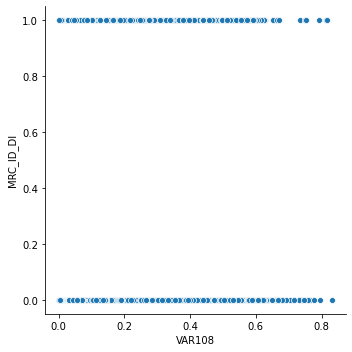

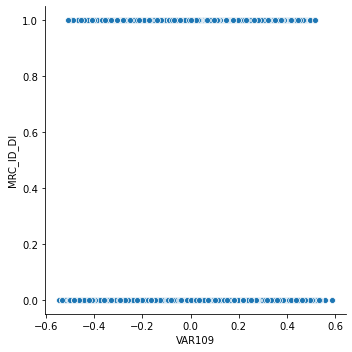

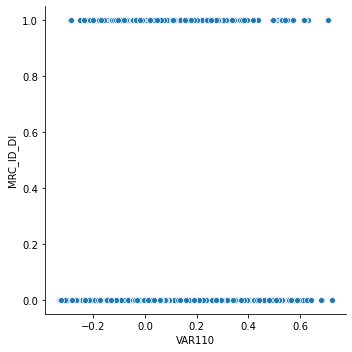

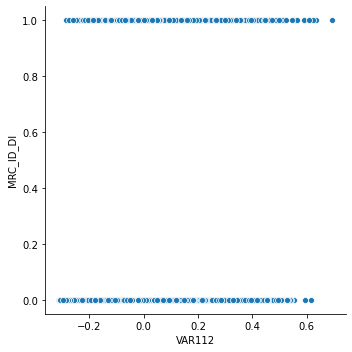

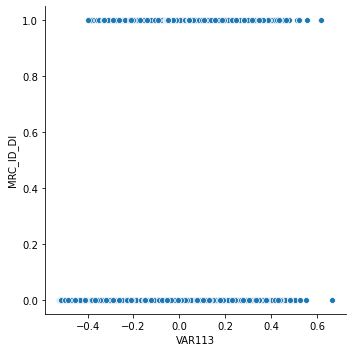

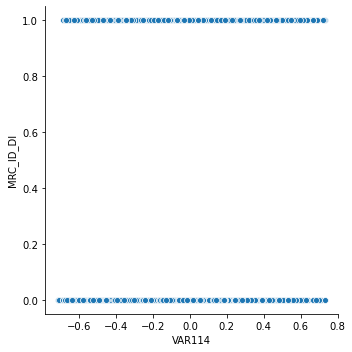

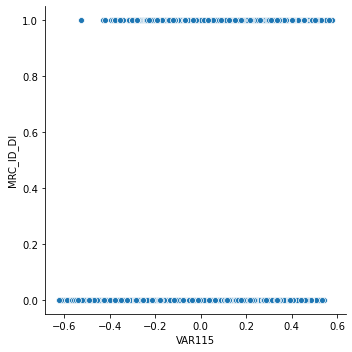

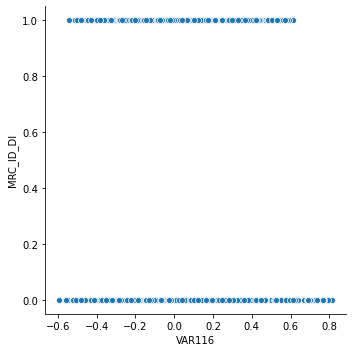

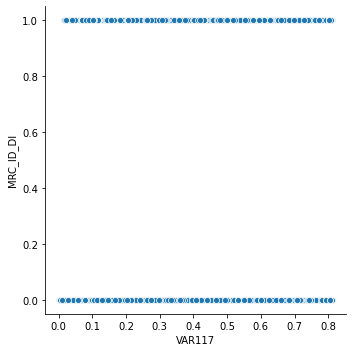

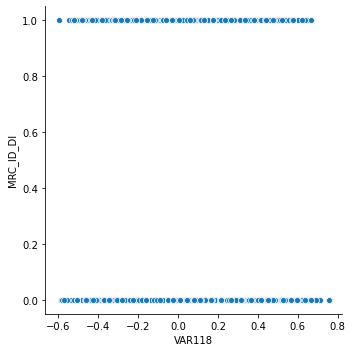

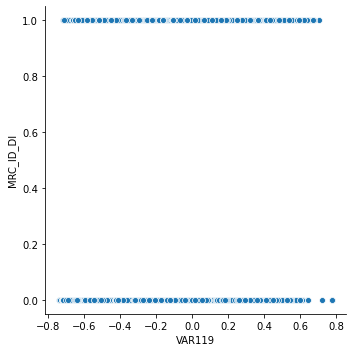

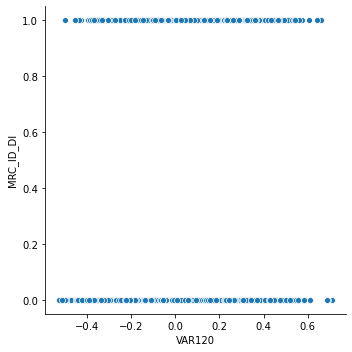

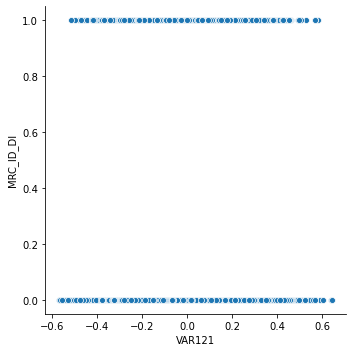

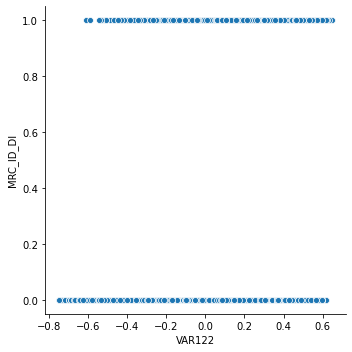

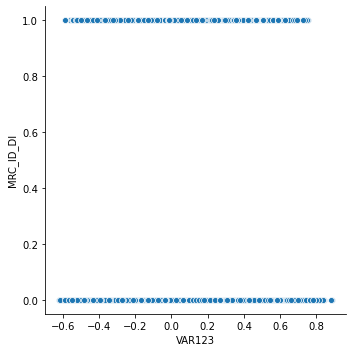

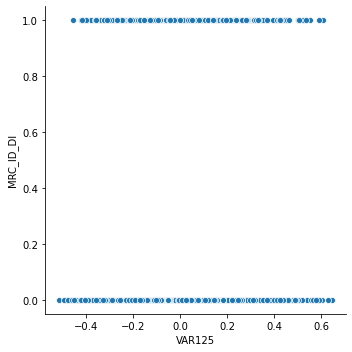

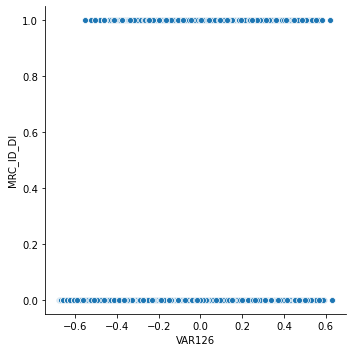

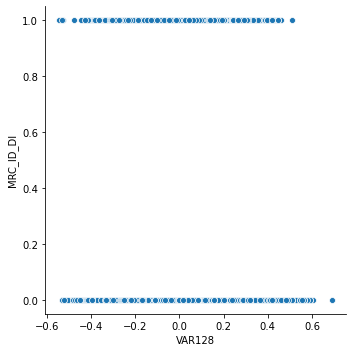

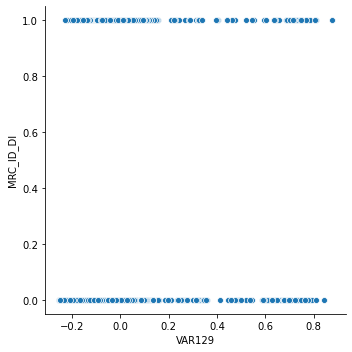

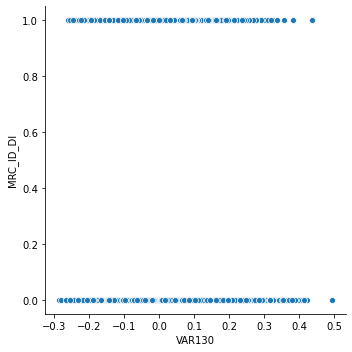

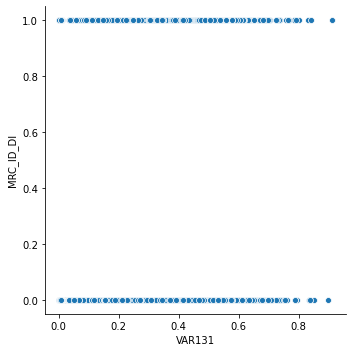

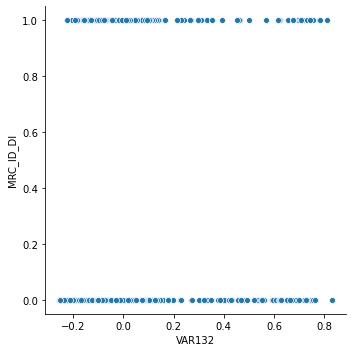

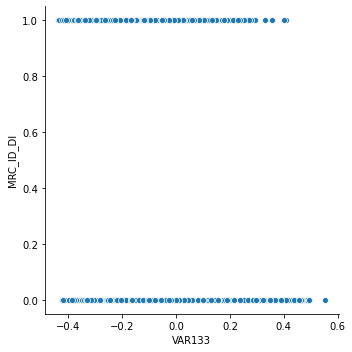

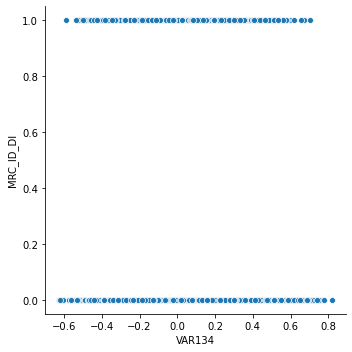

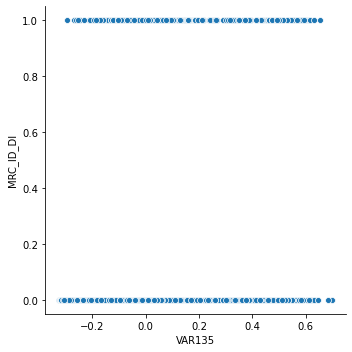

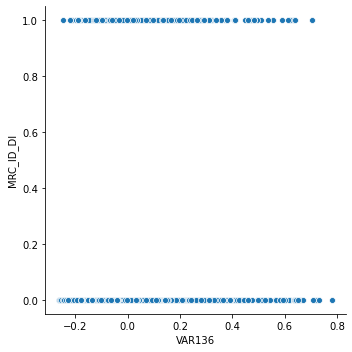

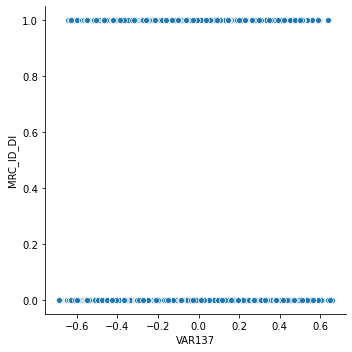

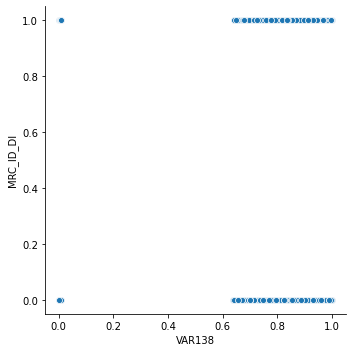

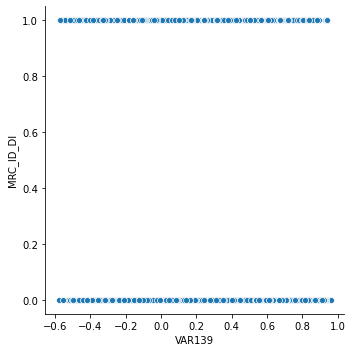

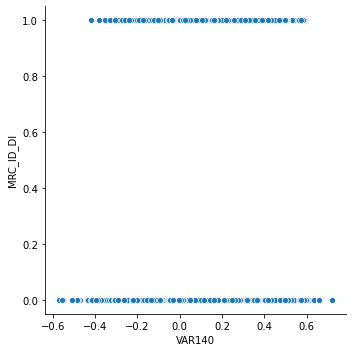

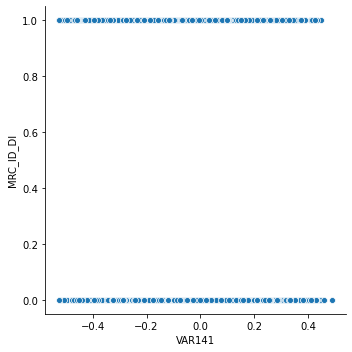

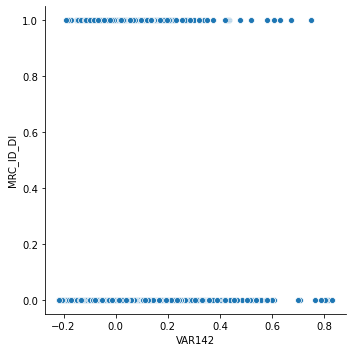

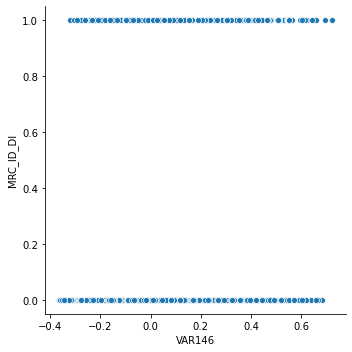

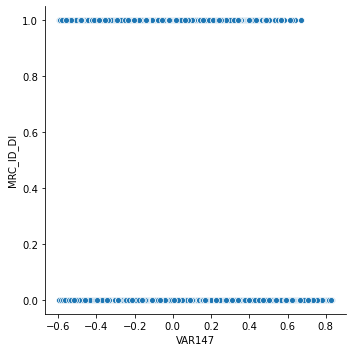

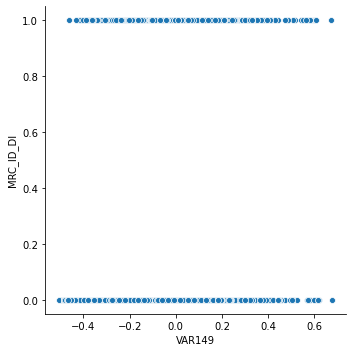

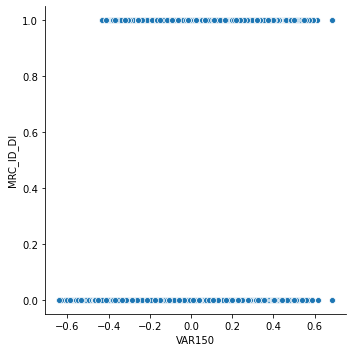

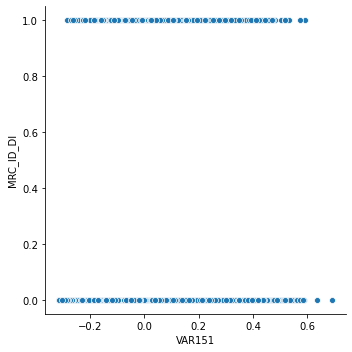

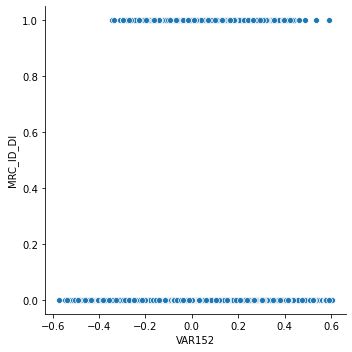

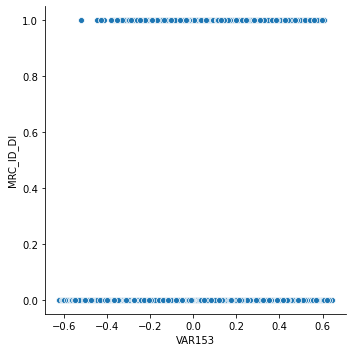

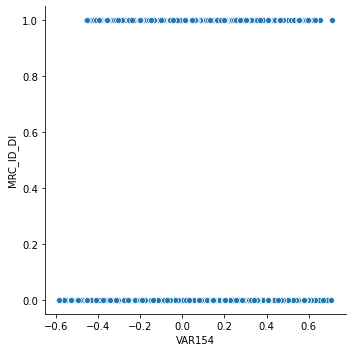

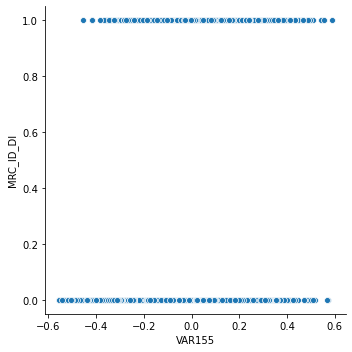

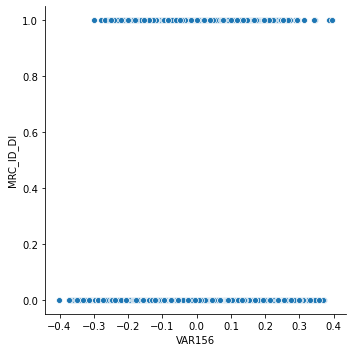

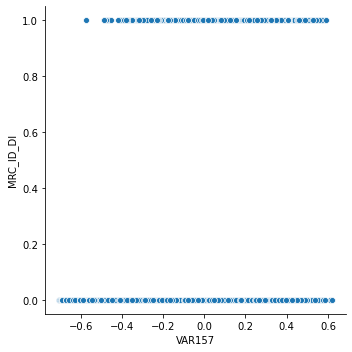

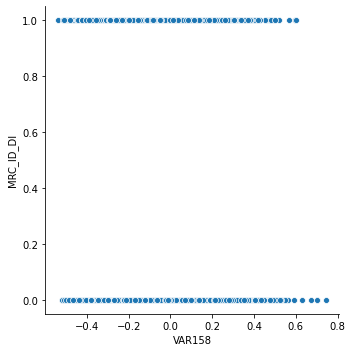

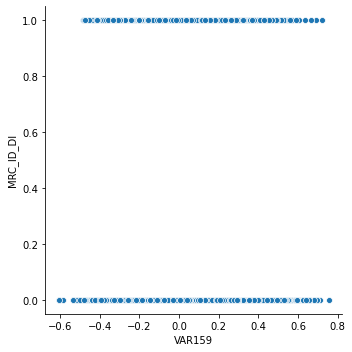

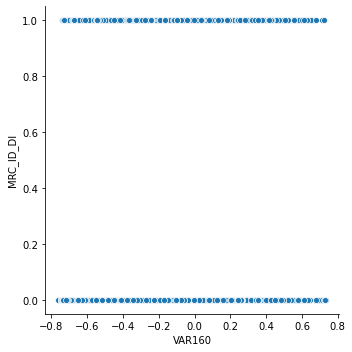

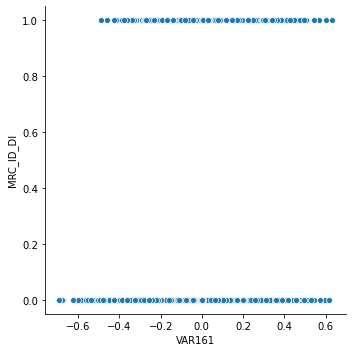

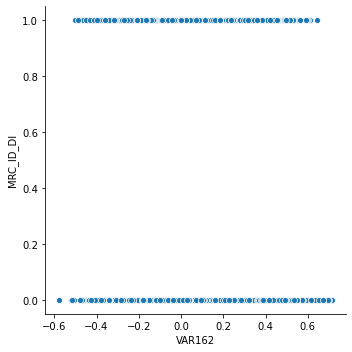

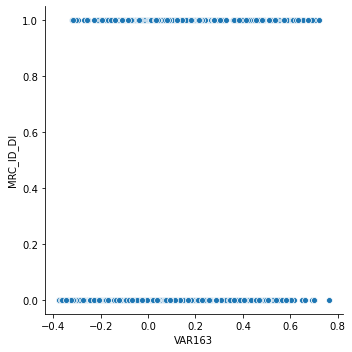

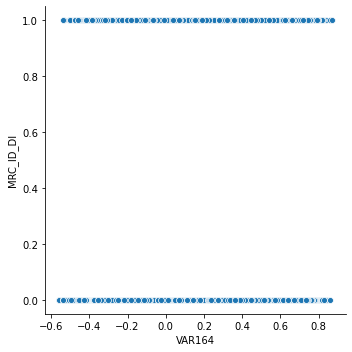

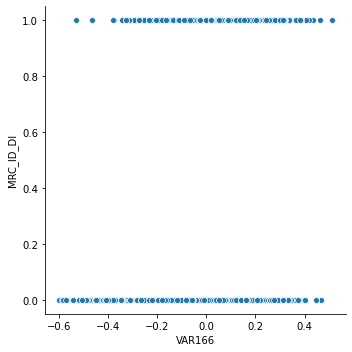

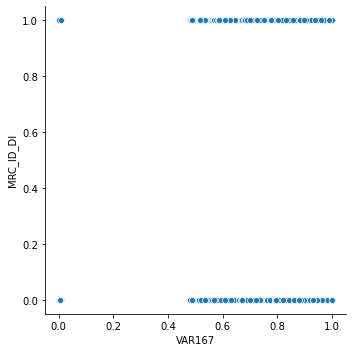

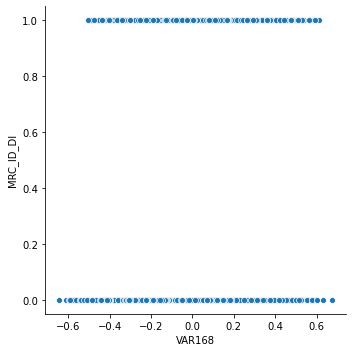

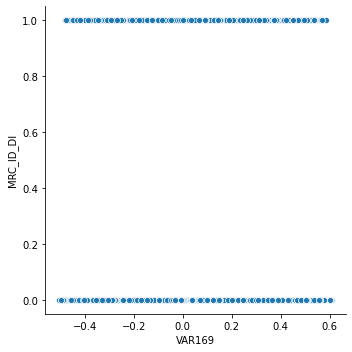

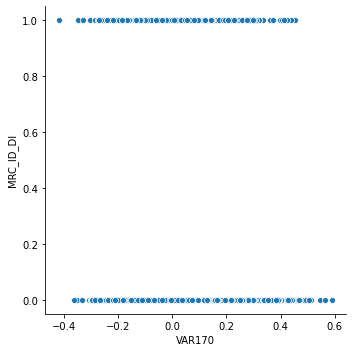

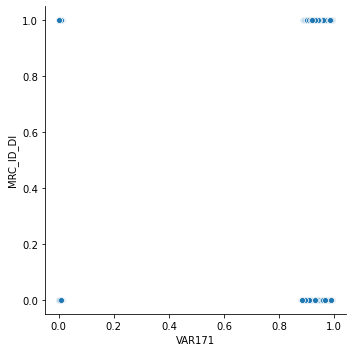

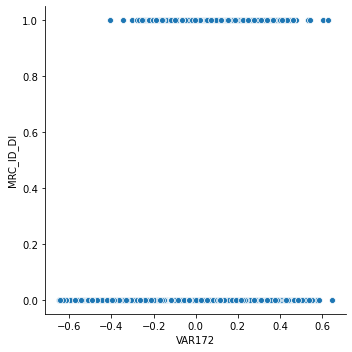

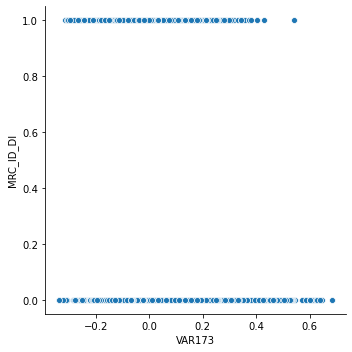

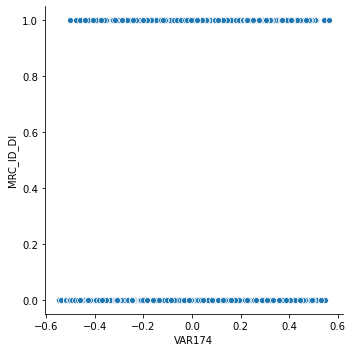

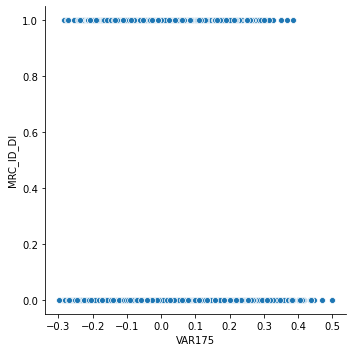

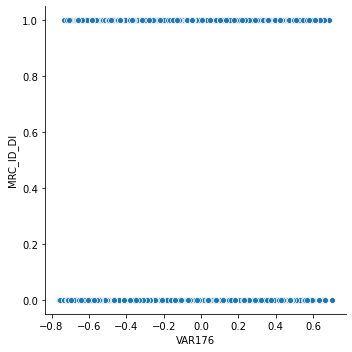

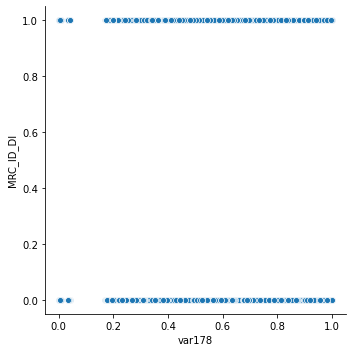

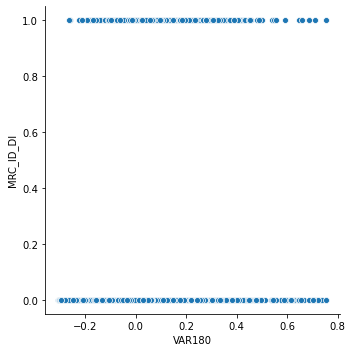

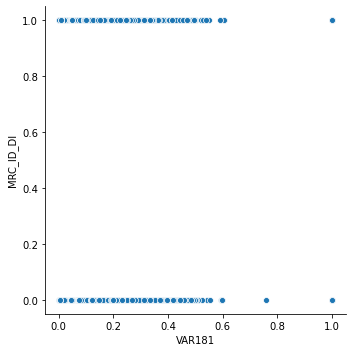

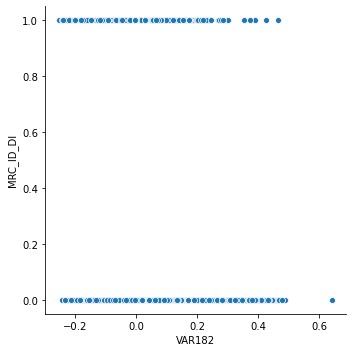

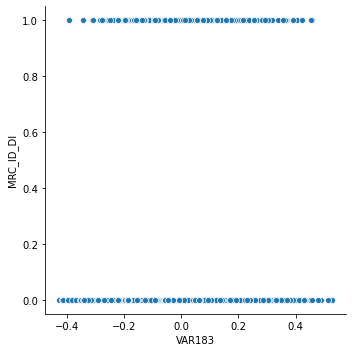

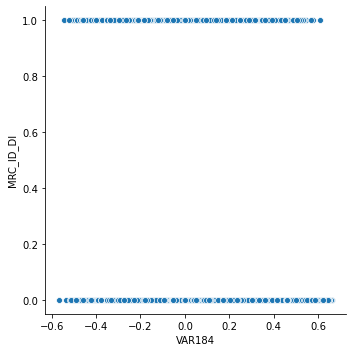

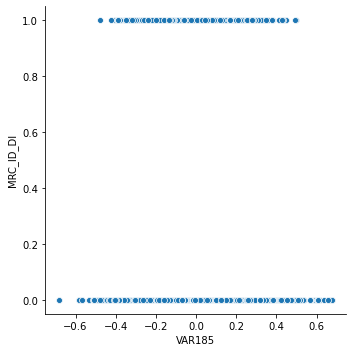

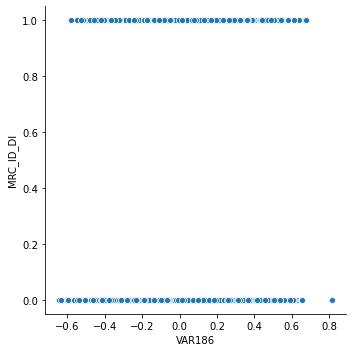

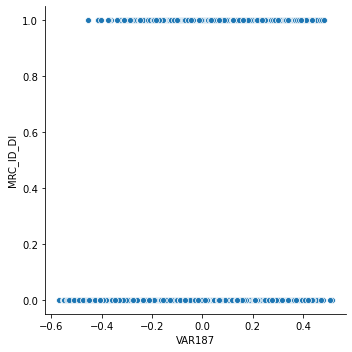

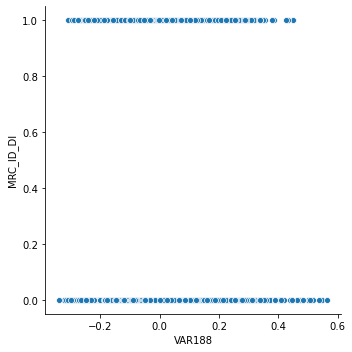

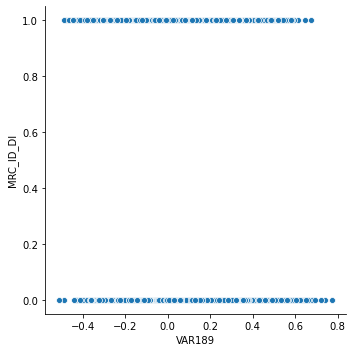

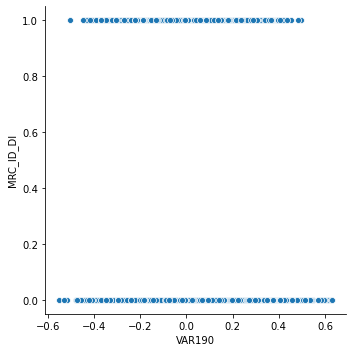

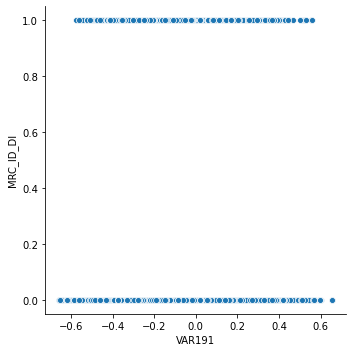

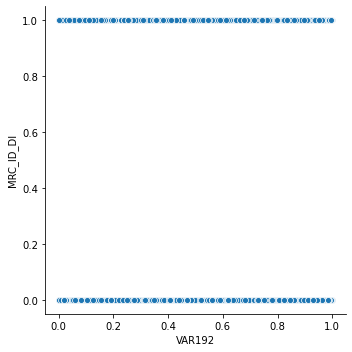

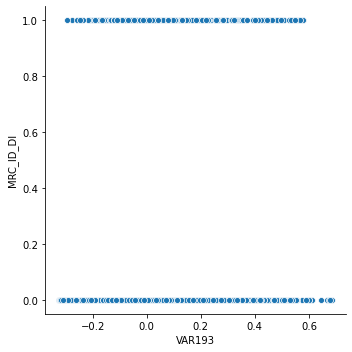

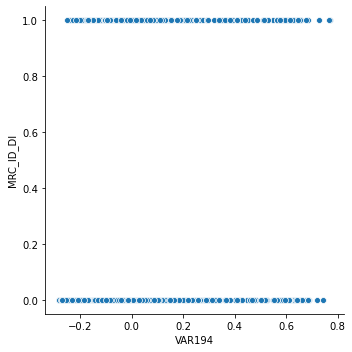

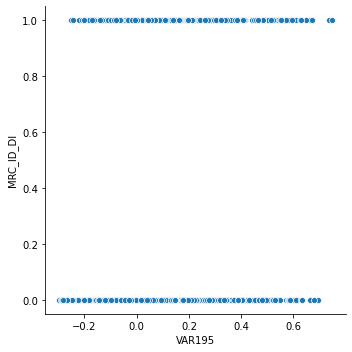

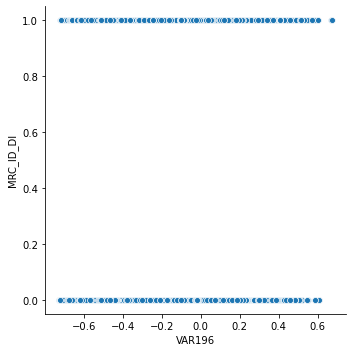

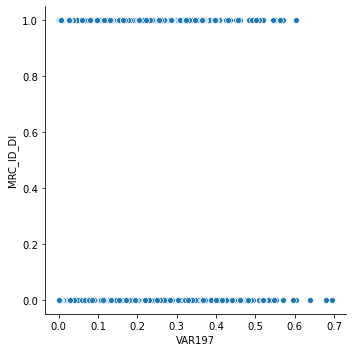

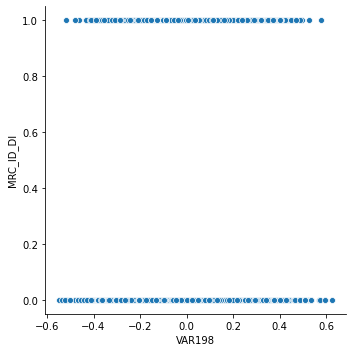

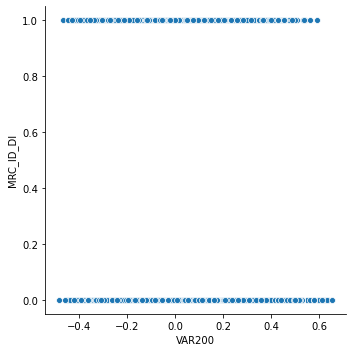

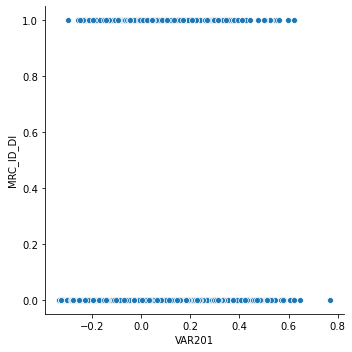

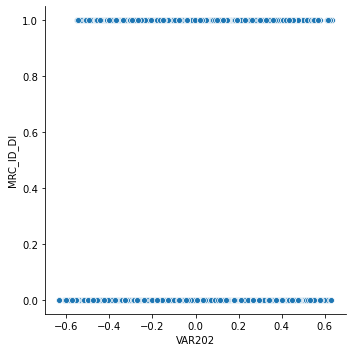

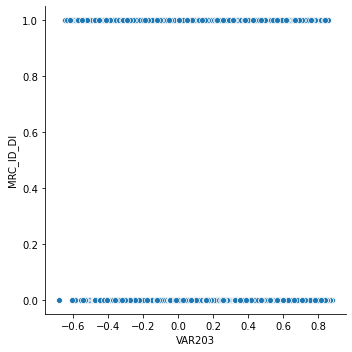

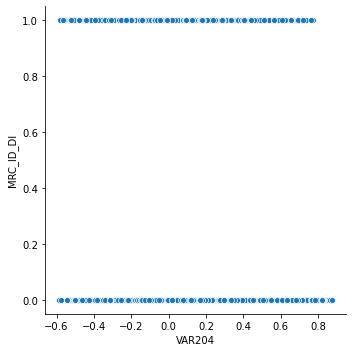

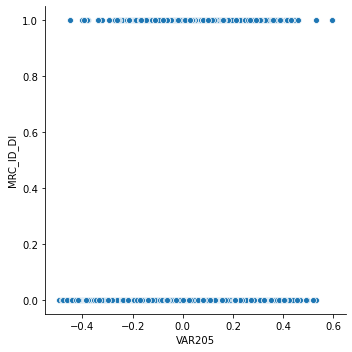

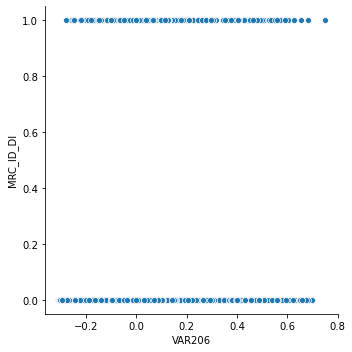

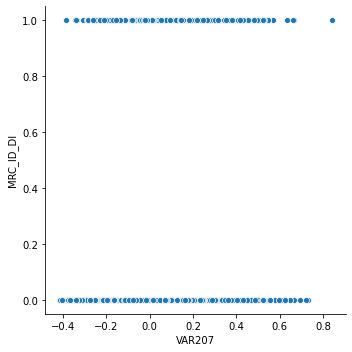

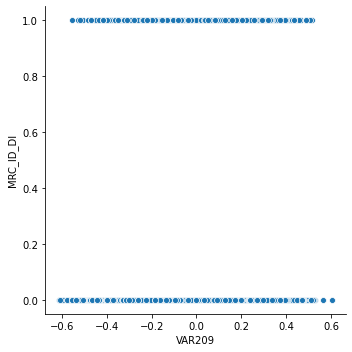

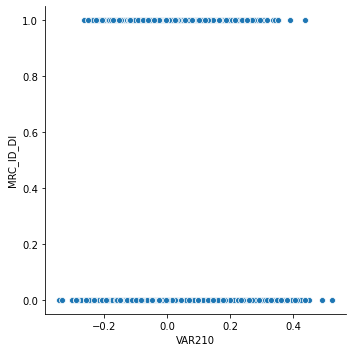

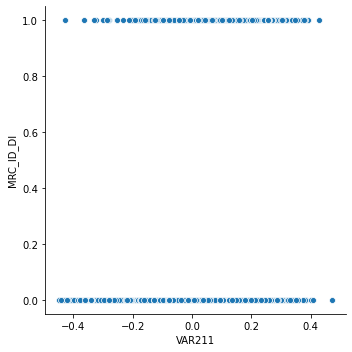

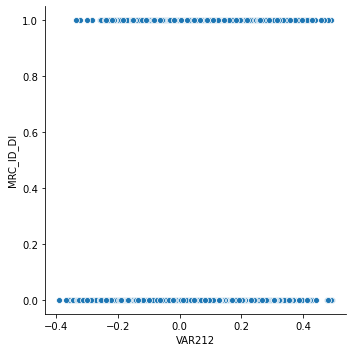

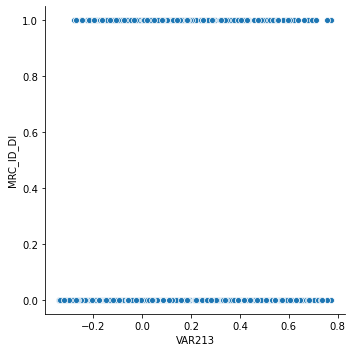

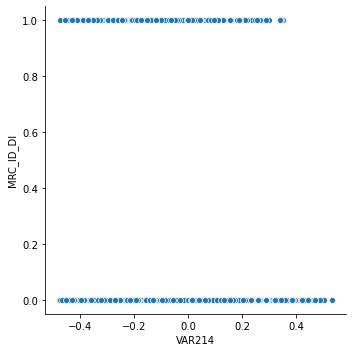

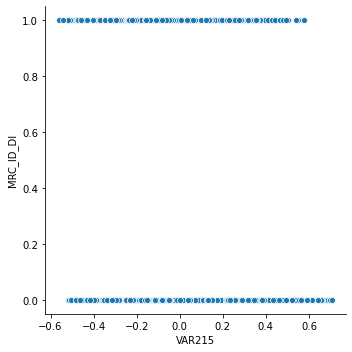

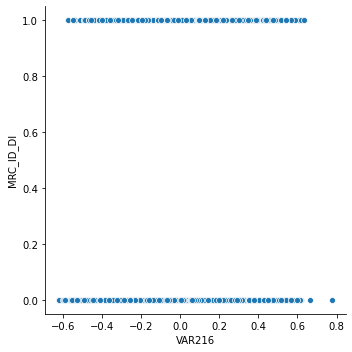

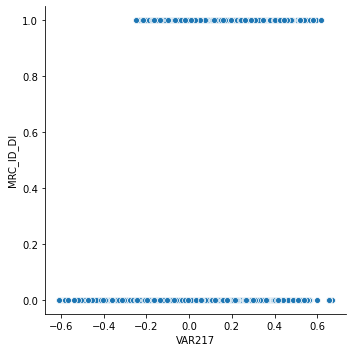

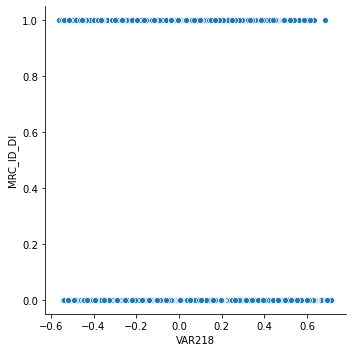

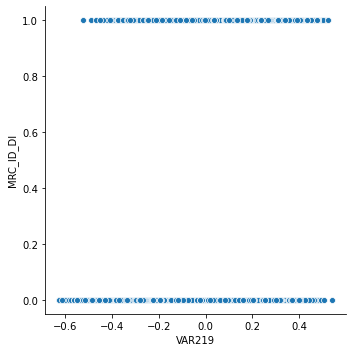

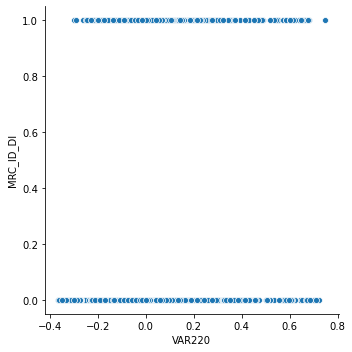

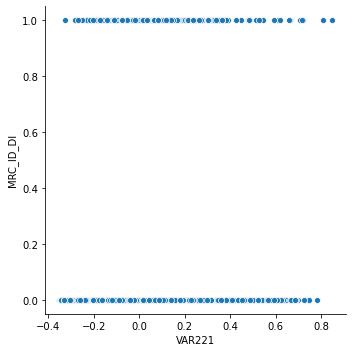

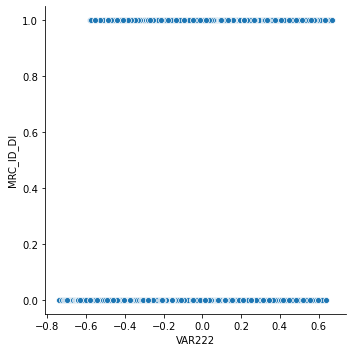

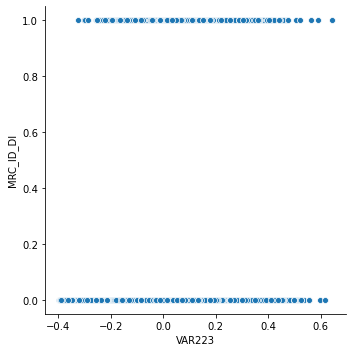

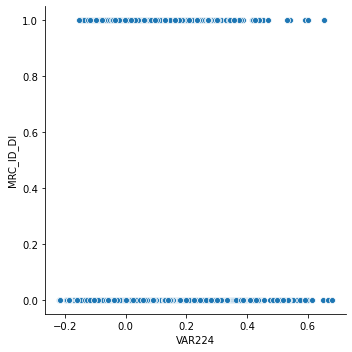

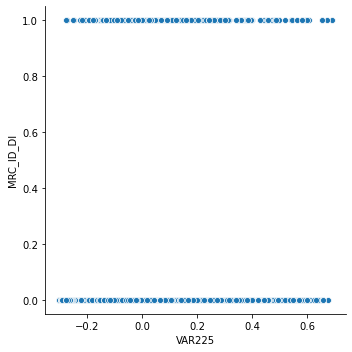

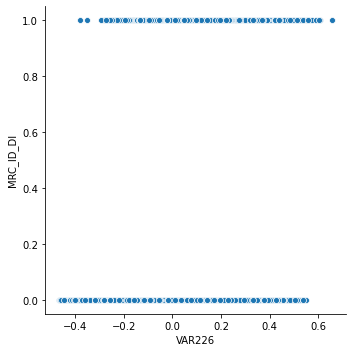

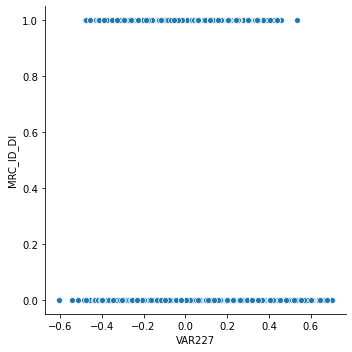

KeyError: 'MRC_ID_DI'

In [9]:
for i in df.columns[1:]:
    if nc.loc[i,'dType'] =='numerical':
        sns.relplot(x=i,y='MRC_ID_DI',data=df)
        plt.show()
    